# Proyecto 3

### Importacion de librerias

In [347]:
# Celda 1: Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


### Carga de datos CSV


In [348]:
# Celda 2: Carga de datos desde CSV
import os

CARPETA = r"D:\Desarrollo de sistemas\bd-ejercicio\proyecto1"

# Función para cargar archivos CSV
def cargar_csv(nombre_archivo):
    ruta = os.path.join(CARPETA, nombre_archivo)
    try:
        df = pd.read_csv(ruta)
        print(f"✅ {nombre_archivo}: {len(df)} registros cargados")
        return df
    except FileNotFoundError:
        print(f"❌ {nombre_archivo}: Archivo no encontrado")
        return None
    except Exception as e:
        print(f"❌ {nombre_archivo}: Error - {e}")
        return None

# Cargar todas las tablas
clientes = cargar_csv("clientes.csv")
localidades = cargar_csv("localidades.csv")
provincias = cargar_csv("provincias.csv")
productos = cargar_csv("productos.csv")
rubros = cargar_csv("rubros.csv")
sucursales = cargar_csv("sucursales.csv")
facturaenc = cargar_csv("facturaenc.csv")
facturadet = cargar_csv("facturadet.csv")
ventas = cargar_csv("ventas.csv")
proveedores = cargar_csv("proveedores.csv")

print("\n📊 Resumen de datos cargados:")
datos_cargados = {
    'Clientes': len(clientes) if clientes is not None else 0,
    'Localidades': len(localidades) if localidades is not None else 0,
    'Provincias': len(provincias) if provincias is not None else 0,
    'Productos': len(productos) if productos is not None else 0,
    'Rubros': len(rubros) if rubros is not None else 0,
    'Sucursales': len(sucursales) if sucursales is not None else 0,
    'Facturas Enc': len(facturaenc) if facturaenc is not None else 0,
    'Facturas Det': len(facturadet) if facturadet is not None else 0,
    'Ventas': len(ventas) if ventas is not None else 0,
    'Proveedores': len(proveedores) if proveedores is not None else 0
}

for tabla, cantidad in datos_cargados.items():
    print(f"   {tabla}: {cantidad} registros")

✅ clientes.csv: 45 registros cargados
✅ localidades.csv: 12 registros cargados
✅ provincias.csv: 24 registros cargados
✅ productos.csv: 46 registros cargados
✅ rubros.csv: 6 registros cargados
✅ sucursales.csv: 11 registros cargados
✅ facturaenc.csv: 30 registros cargados
✅ facturadet.csv: 56 registros cargados
✅ ventas.csv: 10 registros cargados
✅ proveedores.csv: 5 registros cargados

📊 Resumen de datos cargados:
   Clientes: 45 registros
   Localidades: 12 registros
   Provincias: 24 registros
   Productos: 46 registros
   Rubros: 6 registros
   Sucursales: 11 registros
   Facturas Enc: 30 registros
   Facturas Det: 56 registros
   Ventas: 10 registros
   Proveedores: 5 registros


### Procesamiento y Limpieza de los datos

In [349]:
# Celda 3: Preprocesamiento y limpieza de datos
print("🔧 Preprocesamiento de datos...")

# Limpiar y convertir tipos de datos
if clientes is not None:
    clientes = clientes.dropna(how='all')
    clientes['id_cliente'] = pd.to_numeric(clientes['id_cliente'], errors='coerce')
    clientes['id_localidad'] = pd.to_numeric(clientes['id_localidad'], errors='coerce')

if productos is not None:
    productos = productos.dropna(how='all')
    productos['id_producto'] = pd.to_numeric(productos['id_producto'], errors='coerce')
    productos['precio'] = pd.to_numeric(productos['precio'], errors='coerce')
    productos['stock'] = pd.to_numeric(productos['stock'], errors='coerce')
    productos['id_proveedor'] = pd.to_numeric(productos['id_proveedor'], errors='coerce')
    productos['id_rubro'] = pd.to_numeric(productos['id_rubro'], errors='coerce')

if facturaenc is not None:
    facturaenc = facturaenc.dropna(how='all')
    facturaenc['id_facturaENC'] = pd.to_numeric(facturaenc['id_facturaENC'], errors='coerce')
    facturaenc['id_cliente'] = pd.to_numeric(facturaenc['id_cliente'], errors='coerce')
    # Convertir fecha si existe
    if 'fecha' in facturaenc.columns:
        facturaenc['fecha'] = pd.to_datetime(facturaenc['fecha'], errors='coerce')

if facturadet is not None:
    facturadet = facturadet.dropna(how='all')
    facturadet['id_facturaDET'] = pd.to_numeric(facturadet['id_facturaDET'], errors='coerce')
    facturadet['id_producto'] = pd.to_numeric(facturadet['id_producto'], errors='coerce')
    facturadet['cantidad'] = pd.to_numeric(facturadet['cantidad'], errors='coerce')
    facturadet['precio_unitario'] = pd.to_numeric(facturadet['precio_unitario'], errors='coerce')

if ventas is not None:
    ventas = ventas.dropna(how='all')
    # Convertir columnas numéricas en ventas
    for col in ventas.columns:
        if 'id' in col.lower() or 'cantidad' in col.lower() or 'precio' in col.lower():
            ventas[col] = pd.to_numeric(ventas[col], errors='coerce')

print("✅ Preprocesamiento completado")

🔧 Preprocesamiento de datos...
✅ Preprocesamiento completado


#### Actualizacion de precios entre columnas

In [350]:
# 🔧 Celda extra: Actualizar precios en facturadet con los de productos
print("🔁 Actualizando precios unitarios de facturadet con los valores más recientes de productos...")

if facturadet is not None and productos is not None:
    # Guardar precio anterior por si querés comparar
    facturadet['precio_unitario_original'] = facturadet['precio_unitario']

    # Hacer el merge para traer los precios nuevos
    facturadet = pd.merge(
        facturadet.drop(columns=['precio_unitario'], errors='ignore'),
        productos[['id_producto', 'precio']],
        on='id_producto',
        how='left'
    )

    # Renombrar columna 'precio' a 'precio_unitario'
    facturadet.rename(columns={'precio': 'precio_unitario'}, inplace=True)

    print(f"✅ Precios actualizados: {len(facturadet)} registros")
    
    # Calcular diferencia promedio
    diff = (facturadet['precio_unitario_original'] - facturadet['precio_unitario']).mean()
    print(f"💰 Diferencia promedio de precio: {diff:,.2f}")
else:
    print("❌ No se pudieron actualizar precios: faltan datos en facturadet o productos")


🔁 Actualizando precios unitarios de facturadet con los valores más recientes de productos...
✅ Precios actualizados: 56 registros
💰 Diferencia promedio de precio: -24,689.29


### Union de datos para analisis

In [351]:
# Celda 4: Actualización de precios y unión de datos para análisis
print("🔄 Actualizando precios de facturadet según productos...")

if facturadet is not None and productos is not None:
    # Actualizar precios con los valores actuales del catálogo
    facturadet_actualizada = pd.merge(
        facturadet[['id_facturaDET', 'id_facturaENC', 'id_producto', 'cantidad']],
        productos[['id_producto', 'precio']],
        on='id_producto',
        how='left'
    )

    # Renombrar columna para mantener consistencia
    facturadet_actualizada = facturadet_actualizada.rename(columns={'precio': 'precio_unitario'})

    # Calcular total por línea
    facturadet_actualizada['total_linea'] = facturadet_actualizada['cantidad'] * facturadet_actualizada['precio_unitario']

    # Reemplazar facturadet original por la actualizada
    facturadet = facturadet_actualizada.copy()

    print(f"✅ Precios actualizados en {len(facturadet)} registros de detalle.")
else:
    print("⚠️ No se pudo actualizar facturadet: faltan datos de productos o facturadet.")

# -----------------------------------------------------------------------
print("\n🔄 Uniendo datos para análisis...")

# Crear dataframe unificado de ventas
if (facturaenc is not None and facturadet is not None and 
    clientes is not None and productos is not None and
    localidades is not None and provincias is not None and
    rubros is not None):

    # 1️⃣ Unir encabezado con detalle
    ventas_completas = pd.merge(facturaenc, facturadet, on='id_facturaENC', how='inner')

    # 2️⃣ Agregar información de clientes
    ventas_completas = pd.merge(ventas_completas, clientes, on='id_cliente', how='left')

    # 3️⃣ Agregar información de localidades y provincias
    ventas_completas = pd.merge(ventas_completas, localidades, on='id_localidad', how='left')
    ventas_completas = pd.merge(ventas_completas, provincias, on='id_provincia', how='left')

    # 4️⃣ Agregar información de productos y rubros
    ventas_completas = pd.merge(ventas_completas, productos, on='id_producto', how='left')

    ventas_completas['total_linea'] = ventas_completas['cantidad'] * ventas_completas['precio_unitario']

    # 🔍 Limpiar posibles duplicados de id_rubro antes del merge con rubros
    if 'id_rubro_x' in ventas_completas.columns:
        ventas_completas['id_rubro'] = ventas_completas['id_rubro_x']
        ventas_completas.drop(columns=['id_rubro_x', 'id_rubro_y'], errors='ignore', inplace=True)
    elif 'id_rubro_y' in ventas_completas.columns:
        ventas_completas['id_rubro'] = ventas_completas['id_rubro_y']
        ventas_completas.drop(columns=['id_rubro_y'], errors='ignore', inplace=True)

    # 5️⃣ Agregar nombres de rubros
    ventas_completas = pd.merge(ventas_completas, rubros, on='id_rubro', how='left')

    # 6️⃣ Asegurar que total_linea esté presente (si no lo está)
    if 'total_linea' not in ventas_completas.columns:
        ventas_completas['total_linea'] = ventas_completas['cantidad'] * ventas_completas['precio_unitario']

    # 7️⃣ Mostrar información resumida
    print(f"✅ Datos unificados: {len(ventas_completas)} registros de ventas")
    print(f"📅 Rango de fechas: {ventas_completas['fecha'].min()} a {ventas_completas['fecha'].max()}")

else:
    ventas_completas = None
    print("❌ No se pudieron unir todos los datos necesarios")

# -----------------------------------------------------------------------
# Mostrar estructura de datos unificados
if ventas_completas is not None:
    print("\n📋 Columnas disponibles:")
    for col in ventas_completas.columns:
        print(f"   - {col}")

    # 👀 Verificar que los rubros estén correctamente enlazados
    print("\n🧾 Rubros detectados:")
    print(ventas_completas['nombre_rubro'].value_counts(dropna=False))


🔄 Actualizando precios de facturadet según productos...
✅ Precios actualizados en 56 registros de detalle.

🔄 Uniendo datos para análisis...
✅ Datos unificados: 56 registros de ventas
📅 Rango de fechas: 2023-04-14 00:00:00 a 2025-12-08 00:00:00

📋 Columnas disponibles:
   - id_facturaENC
   - numero
   - fecha
   - condicion_IVA
   - id_sucursal
   - id_cliente
   - id_facturaDET
   - id_producto
   - cantidad
   - precio_unitario
   - total_linea
   - nombre
   - id_localidad
   - domicilio
   - nombre_localidad
   - id_provincia
   - nombre_provincia
   - descripcion
   - precio
   - id_proveedor
   - id_rubro
   - stock
   - nombre_rubro

🧾 Rubros detectados:
nombre_rubro
Periféricos        16
Audio y Video      13
Computadoras       12
Almacenamiento      7
Impresión y Con     6
Tecno               2
Name: count, dtype: int64


## Grafico 1 - Ventas por mes

📈 Generando gráfico de ventas por mes...


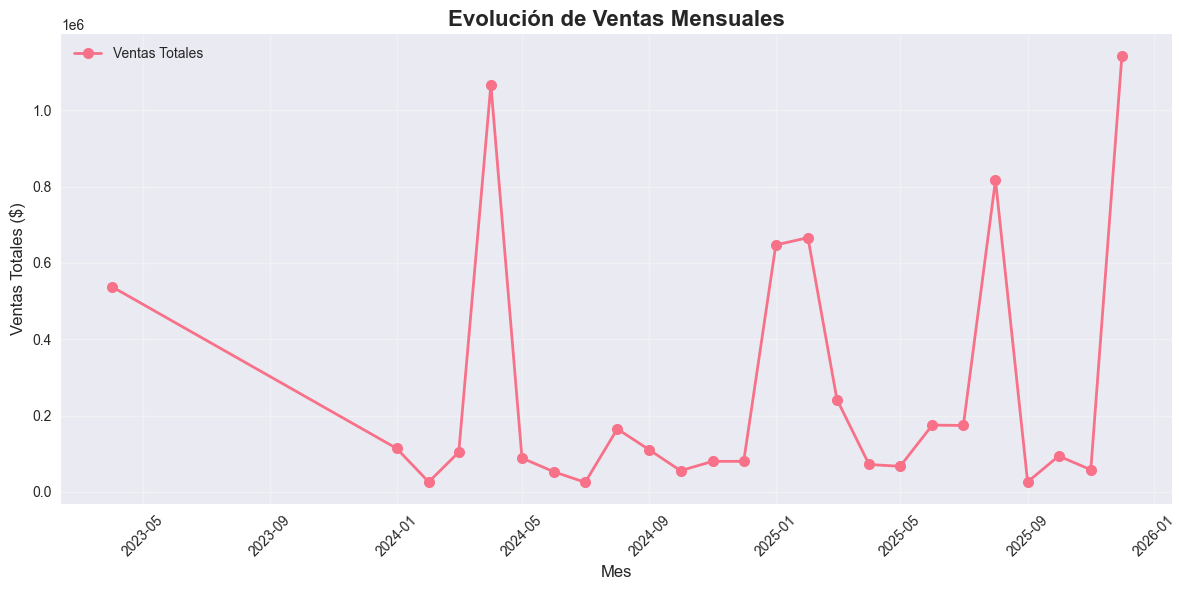

💰 Ventas totales: $6,686,400.00
📅 Período analizado: Apr 2023 - Dec 2025


In [352]:
# Celda 5: Gráfico 1 - Ventas por Mes (Gráfico Lineal)
print("📈 Generando gráfico de ventas por mes...")

if ventas_completas is not None and 'fecha' in ventas_completas.columns:
    plt.figure(figsize=(12, 6))
    
    # Agrupar ventas por mes
    ventas_completas['mes'] = ventas_completas['fecha'].dt.to_period('M')
    ventas_por_mes = ventas_completas.groupby('mes')['total_linea'].sum().reset_index()
    ventas_por_mes['mes'] = ventas_por_mes['mes'].dt.to_timestamp()
    
    plt.plot(ventas_por_mes['mes'], ventas_por_mes['total_linea'], 
             marker='o', linewidth=2, markersize=8, label='Ventas Totales')
    
    plt.title('Evolución de Ventas Mensuales', fontsize=16, fontweight='bold')
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Ventas Totales ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"💰 Ventas totales: ${ventas_por_mes['total_linea'].sum():,.2f}")
    print(f"📅 Período analizado: {ventas_por_mes['mes'].min().strftime('%b %Y')} - {ventas_por_mes['mes'].max().strftime('%b %Y')}")
else:
    print("❌ No hay datos de ventas o fechas para generar el gráfico")


## Grafico 2 - Ventas por rubro

📊 Generando gráfico de ventas por rubro...
✅ Encontrada columna 'nombre_rubro'


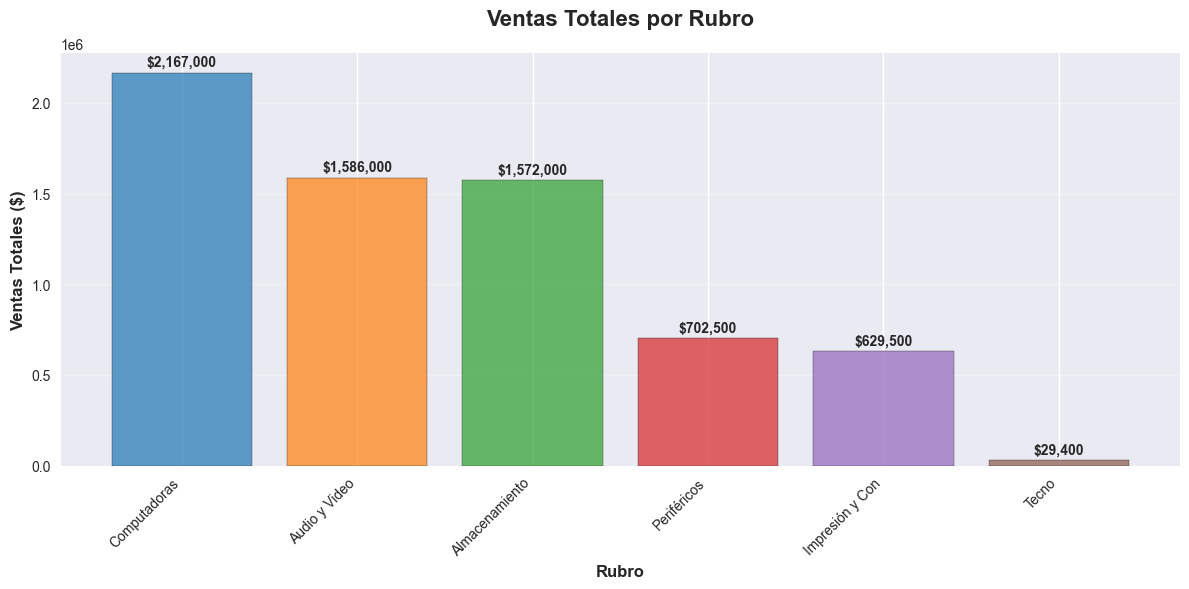


📈 ESTADÍSTICAS DE RUBROS:
   Total de rubros: 6
   Ventas totales en rubros: $6,686,400.00

🏆 TOP 3 RUBROS POR VENTAS:
   1. Computadoras: $2,167,000.00 (32.4%)
   2. Audio y Video: $1,586,000.00 (23.7%)
   3. Almacenamiento: $1,572,000.00 (23.5%)

📋 TODOS LOS RUBROS:
   • Computadoras: $2,167,000.00 (32.4%)
   • Audio y Video: $1,586,000.00 (23.7%)
   • Almacenamiento: $1,572,000.00 (23.5%)
   • Periféricos: $702,500.00 (10.5%)
   • Impresión y Con: $629,500.00 (9.4%)
   • Tecno: $29,400.00 (0.4%)


In [353]:
# Celda 6: Gráfico 2 - Ventas por Rubro (Gráfico de Barras) - MEJORADO
print("📊 Generando gráfico de ventas por rubro...")


if ventas_completas is not None:
    # Buscar específicamente la columna nombre_rubro
    rubro_col = None
    
    # Primero buscar 'nombre_rubro' específicamente
    if 'nombre_rubro' in ventas_completas.columns:
        rubro_col = 'nombre_rubro'
        print("✅ Encontrada columna 'nombre_rubro'")
    else:
        # Si no existe, buscar cualquier columna que tenga 'rubro'
        for col in ventas_completas.columns:
            if 'rubro' in col.lower():
                rubro_col = col
                print(f"✅ Usando columna: {rubro_col}")
                break
    
    if rubro_col:
        plt.figure(figsize=(12, 6))
        
        # Agrupar por rubro y sumar ventas
        ventas_por_rubro = ventas_completas.groupby(rubro_col)['total_linea'].sum().sort_values(ascending=False)
        
        # Crear el gráfico de barras
        bars = plt.bar(range(len(ventas_por_rubro)), ventas_por_rubro.values, 
                      color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
                      edgecolor='black', alpha=0.7)
        
        # Personalizar el gráfico
        plt.title('Ventas Totales por Rubro', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Rubro', fontsize=12, fontweight='bold')
        plt.ylabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
        
        # Configurar los nombres en el eje X
        plt.xticks(range(len(ventas_por_rubro)), ventas_por_rubro.index, rotation=45, ha='right')
        
        # Agregar valores en las barras
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + max(ventas_por_rubro.values) * 0.01,
                    f'${height:,.0f}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Mejorar la apariencia
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()
        
        # Mostrar estadísticas
        print(f"\n📈 ESTADÍSTICAS DE RUBROS:")
        print(f"   Total de rubros: {len(ventas_por_rubro)}")
        print(f"   Ventas totales en rubros: ${ventas_por_rubro.sum():,.2f}")
        
        print("\n🏆 TOP 3 RUBROS POR VENTAS:")
        for i, (rubro, ventas) in enumerate(ventas_por_rubro.head(3).items(), 1):
            porcentaje = (ventas / ventas_por_rubro.sum()) * 100
            print(f"   {i}. {rubro}: ${ventas:,.2f} ({porcentaje:.1f}%)")
        
        # Mostrar todos los rubros si son pocos
        if len(ventas_por_rubro) <= 10:
            print(f"\n📋 TODOS LOS RUBROS:")
            for rubro, ventas in ventas_por_rubro.items():
                porcentaje = (ventas / ventas_por_rubro.sum()) * 100
                print(f"   • {rubro}: ${ventas:,.2f} ({porcentaje:.1f}%)")
        
    else:
        print("❌ No se pudo encontrar la columna de rubros")
        print("🔍 Columnas disponibles en ventas_completas:")
        for i, col in enumerate(ventas_completas.columns, 1):
            print(f"   {i:2d}. {col}")
        
        # Mostrar valores únicos de posibles columnas de rubro
        print("\n🔍 Valores únicos en columnas relacionadas:")
        for col in ventas_completas.columns:
            if 'rubro' in col.lower() or 'categoria' in col.lower():
                unique_vals = ventas_completas[col].dropna().unique()
                print(f"   {col}: {list(unique_vals)[:5]}...")  # Mostrar primeros 5 valores
else:
    print("❌ No hay datos de ventas para generar el gráfico")

## Grafico 3 - Clientes por provincias

🗺️ Generando gráfico de clientes por provincia...
📋 Columnas en clientes_completos: ['id_cliente', 'nombre', 'id_localidad', 'domicilio', 'nombre_localidad', 'id_provincia', 'nombre_provincia']
   - nombre: Ana Gómez
   - nombre_localidad: Localidad 1
   - id_provincia: 1.0
   - nombre_provincia: Buenos Aires


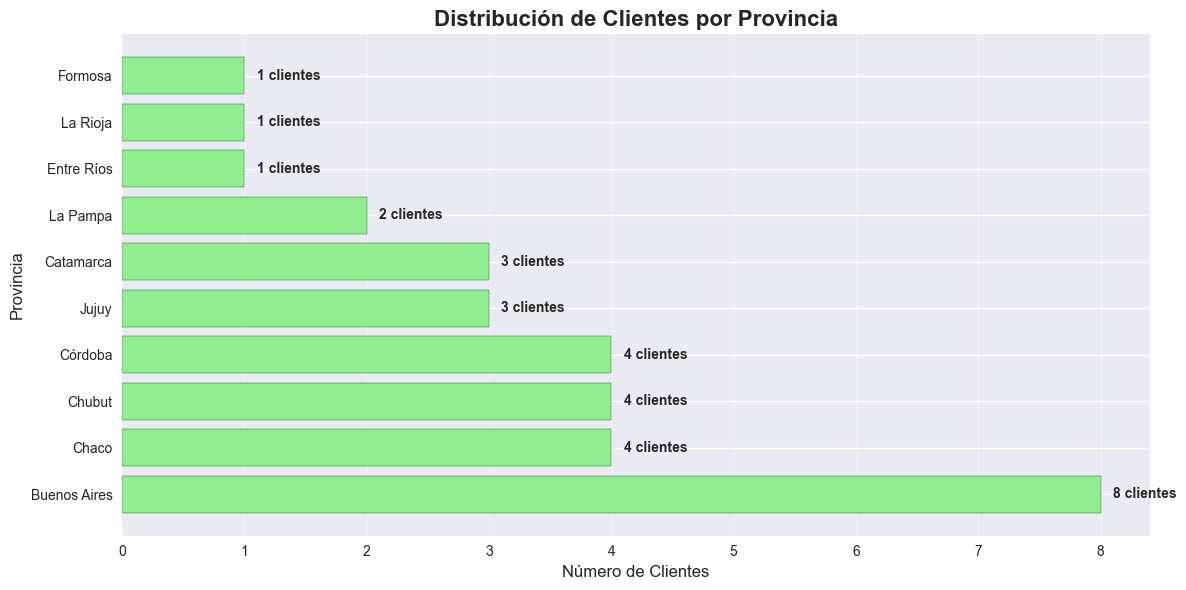

👥 Total de clientes: 45
🏙️ Provincias con clientes: 10
📍 Columna usada para provincias: nombre_provincia


In [354]:
# Celda 7: Gráfico 3 - Clientes por Provincia (Gráfico de Barras) - CORREGIDO
print("🗺️ Generando gráfico de clientes por provincia...")

if clientes is not None and localidades is not None and provincias is not None:
    # Unir clientes con localidades y provincias
    clientes_completos = pd.merge(clientes, localidades, on='id_localidad', how='left')
    clientes_completos = pd.merge(clientes_completos, provincias, on='id_provincia', how='left')
    
    # Verificar las columnas disponibles
    print("📋 Columnas en clientes_completos:", list(clientes_completos.columns))
    
    # Buscar la columna correcta para el nombre de la provincia
    provincia_col = None
    for col in clientes_completos.columns:
        if 'provincia' in col.lower() or 'nombre' in col.lower():
            print(f"   - {col}: {clientes_completos[col].iloc[0] if len(clientes_completos) > 0 else 'N/A'}")
            if 'provincia' in col.lower():
                provincia_col = col
    
    # Si no encontramos una columna específica, usar la última columna de nombre
    if provincia_col is None:
        nombre_cols = [col for col in clientes_completos.columns if 'nombre' in col.lower()]
        if len(nombre_cols) > 1:
            provincia_col = nombre_cols[1]  # Generalmente nombre_y es la provincia
        elif nombre_cols:
            provincia_col = nombre_cols[0]
    
    if provincia_col:
        plt.figure(figsize=(12, 6))
        
        clientes_por_provincia = clientes_completos[provincia_col].value_counts()
        
        # Gráfico de barras horizontal
        bars = plt.barh(clientes_por_provincia.index, clientes_por_provincia.values, color='lightgreen', edgecolor='darkgreen')
        
        # Agregar valores en las barras
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                    f'{int(width)} clientes',
                    ha='left', va='center', fontweight='bold')
        
        plt.title('Distribución de Clientes por Provincia', fontsize=16, fontweight='bold')
        plt.xlabel('Número de Clientes', fontsize=12)
        plt.ylabel('Provincia', fontsize=12)
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        print(f"👥 Total de clientes: {len(clientes_completos)}")
        print(f"🏙️ Provincias con clientes: {len(clientes_por_provincia)}")
        print(f"📍 Columna usada para provincias: {provincia_col}")
    else:
        print("❌ No se pudo encontrar la columna de nombres de provincia")
        print("🔍 Columnas disponibles:", list(clientes_completos.columns))
else:
    print("❌ No hay datos completos de clientes para generar el gráfico")

## Grafico 4 - Ventas totales por provincias 

💰 Generando gráfico de ventas por provincia...


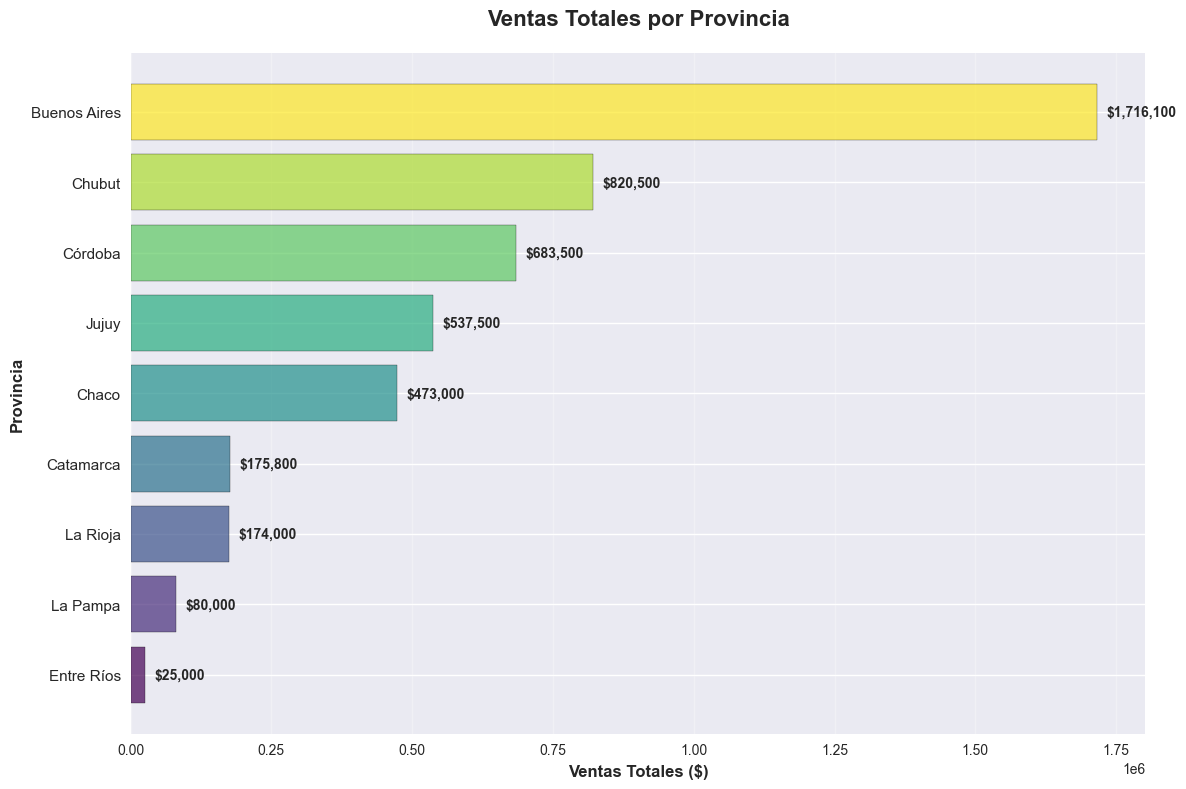


📊 ESTADÍSTICAS POR PROVINCIA:
   Total de provincias: 9
   Ventas totales: $4,685,400.00

🏆 TOP 3 PROVINCIAS POR VENTAS:
   1. Buenos Aires: $1,716,100.00 (36.6%)
   2. Chubut: $820,500.00 (17.5%)
   3. Córdoba: $683,500.00 (14.6%)

📋 TODAS LAS PROVINCIAS:
   • Buenos Aires: $1,716,100.00 (36.6%)
   • Chubut: $820,500.00 (17.5%)
   • Córdoba: $683,500.00 (14.6%)
   • Jujuy: $537,500.00 (11.5%)
   • Chaco: $473,000.00 (10.1%)
   • Catamarca: $175,800.00 (3.8%)
   • La Rioja: $174,000.00 (3.7%)
   • La Pampa: $80,000.00 (1.7%)
   • Entre Ríos: $25,000.00 (0.5%)

📍 Columna usada para provincias: nombre_provincia


In [355]:
# Celda 8: Gráfico 4 - Ventas por Provincia (Gráfico de Barras Horizontal) - MEJORADO
print("💰 Generando gráfico de ventas por provincia...")

if ventas_completas is not None:
    # Buscar la columna correcta para provincias
    provincia_col = None
    for col in ventas_completas.columns:
        if 'provincia' in col.lower() and 'nombre' in col.lower():
            provincia_col = col
            break
    
    # Si no encontramos, buscar alternativas
    if provincia_col is None:
        for col in ventas_completas.columns:
            if 'provincia' in col.lower():
                provincia_col = col
                break
    
    if provincia_col is None:
        for col in ventas_completas.columns:
            if 'nombre' in col.lower() and col != 'nombre' and 'localidad' not in col.lower() and 'rubro' not in col.lower():
                provincia_col = col
                break
    
    if provincia_col:
        plt.figure(figsize=(12, 8))  # Aumenté el tamaño para mejor visualización
        
        # Agrupar por provincia y ordenar por ventas (ascendente para gráfico horizontal)
        ventas_por_provincia = ventas_completas.groupby(provincia_col)['total_linea'].sum().sort_values(ascending=True)
        
        # Crear el gráfico de barras horizontal
        bars = plt.barh(range(len(ventas_por_provincia)), 
                       ventas_por_provincia.values, 
                       color=plt.cm.viridis(np.linspace(0, 1, len(ventas_por_provincia))),
                       edgecolor='black', 
                       alpha=0.7,
                       height=0.8)  # Controlar el grosor de las barras
        
        # Personalizar el eje Y con los nombres de provincias
        plt.yticks(range(len(ventas_por_provincia)), ventas_por_provincia.index)
        
        # Mejorar la apariencia de las etiquetas del eje Y
        plt.tick_params(axis='y', which='major', labelsize=11)
        
        # Agregar valores en las barras
        for i, bar in enumerate(bars):
            width = bar.get_width()
            # Posicionar el texto a la derecha de la barra
            plt.text(width + max(ventas_por_provincia.values) * 0.01, 
                    bar.get_y() + bar.get_height()/2.,
                    f'${width:,.0f}',
                    ha='left', 
                    va='center', 
                    fontweight='bold',
                    fontsize=10)
        
        # Títulos y etiquetas
        plt.title('Ventas Totales por Provincia', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
        plt.ylabel('Provincia', fontsize=12, fontweight='bold')
        
        # Grid y estilo
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        
        # Mostrar el gráfico
        plt.show()
        
        # Estadísticas
        print(f"\n📊 ESTADÍSTICAS POR PROVINCIA:")
        print(f"   Total de provincias: {len(ventas_por_provincia)}")
        print(f"   Ventas totales: ${ventas_por_provincia.sum():,.2f}")
        
        print("\n🏆 TOP 3 PROVINCIAS POR VENTAS:")
        ventas_descendente = ventas_por_provincia.sort_values(ascending=False)
        for i, (provincia, ventas) in enumerate(ventas_descendente.head(3).items(), 1):
            porcentaje = (ventas / ventas_por_provincia.sum()) * 100
            print(f"   {i}. {provincia}: ${ventas:,.2f} ({porcentaje:.1f}%)")
        
        # Mostrar todas las provincias si son pocas
        if len(ventas_por_provincia) <= 15:
            print(f"\n📋 TODAS LAS PROVINCIAS:")
            for provincia, ventas in ventas_descendente.items():
                porcentaje = (ventas / ventas_por_provincia.sum()) * 100
                print(f"   • {provincia}: ${ventas:,.2f} ({porcentaje:.1f}%)")
        
        print(f"\n📍 Columna usada para provincias: {provincia_col}")
        
    else:
        print("❌ No se pudo encontrar la columna de provincias")
        print("🔍 Columnas disponibles en ventas_completas:")
        for i, col in enumerate(ventas_completas.columns, 1):
            print(f"   {i:2d}. {col}")
        
        # Mostrar valores únicos de posibles columnas de provincia
        print("\n🔍 Valores únicos en columnas relacionadas con provincias:")
        for col in ventas_completas.columns:
            if 'provincia' in col.lower() or 'nombre' in col.lower():
                if col not in ['nombre', 'nombre_localidad', 'nombre_rubro']:
                    unique_vals = ventas_completas[col].dropna().unique()
                    if len(unique_vals) > 0:
                        print(f"   {col}: {list(unique_vals)[:5]}")  # Mostrar primeros 5 valores
else:
    print("❌ No hay datos de ventas para generar el gráfico")

## Grafico 5 - Productos mas vendidos en cantidad

🥧 Generando gráfico de productos más vendidos...


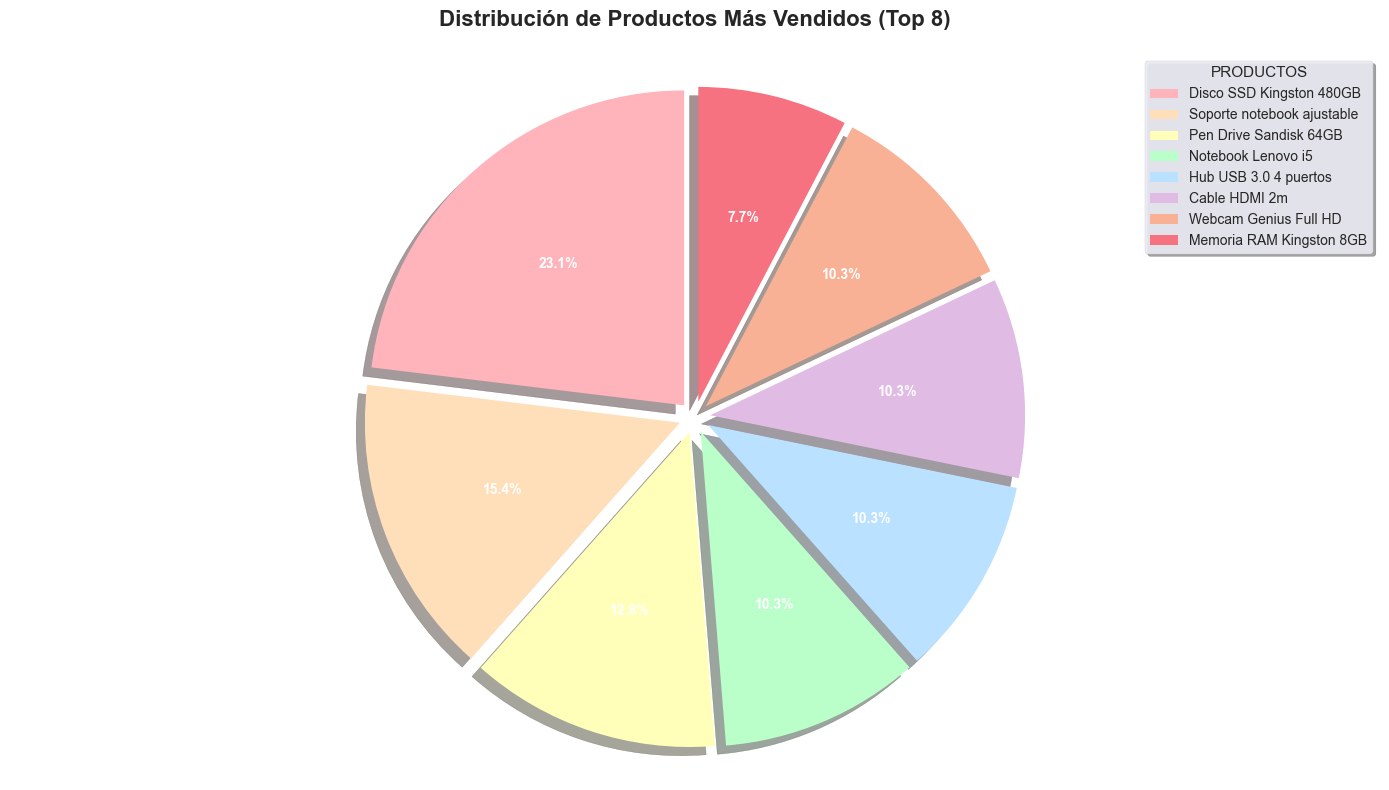


📦 Top 5 productos más vendidos:
   1. Disco SSD Kingston 480GB: 9 unidades
   2. Soporte notebook ajustable: 6 unidades
   3. Pen Drive Sandisk 64GB: 5 unidades
   4. Notebook Lenovo i5: 4 unidades
   5. Hub USB 3.0 4 puertos: 4 unidades
📍 Columna usada para productos: descripcion


In [356]:
# Celda 9: Gráfico 5 - Productos Más Vendidos (Gráfico de Torta) - LEYENDA ARRIBA A LA DERECHA
print("🥧 Generando gráfico de productos más vendidos...")

if ventas_completas is not None:
    # Buscar la columna correcta para productos
    producto_col = None
    for col in ventas_completas.columns:
        if 'descripcion' in col.lower() and 'rubro' not in col.lower():
            producto_col = col
            break
    
    if producto_col is None:
        for col in ventas_completas.columns:
            if 'producto' in col.lower() or 'nombre' in col.lower():
                producto_col = col
                break
    
    if producto_col:
        plt.figure(figsize=(14, 8))  # Aumenté el ancho para dar espacio a la leyenda
        
        productos_vendidos = ventas_completas.groupby(producto_col)['cantidad'].sum().sort_values(ascending=False).head(8)
        
        # Colores pastel suaves
        colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#E0BBE4', '#F8B195', '#F67280']
        
        # Crear el gráfico de torta
        wedges, texts, autotexts = plt.pie(productos_vendidos.values, 
                                          labels=None,  # Quitamos las etiquetas del gráfico principal
                                          autopct='%1.1f%%', 
                                          startangle=90,
                                          colors=colors,
                                          shadow=True,
                                          explode=[0.05] * len(productos_vendidos))
        
        # Personalizar el texto de los porcentajes
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
        
        plt.title('Distribución de Productos Más Vendidos (Top 8)', fontsize=16, fontweight='bold', pad=20)
        plt.axis('equal')
        
        # AGREGAR LEYENDA EN LA ESQUINA SUPERIOR DERECHA
        plt.legend(wedges, productos_vendidos.index,
                  title="PRODUCTOS",
                  loc="upper right",  # Posición: esquina superior derecha
                  bbox_to_anchor=(1, 1),  # Anclaje a la esquina
                  fontsize=10,
                  title_fontsize=11,
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  framealpha=0.9)
        
        # Ajustar el layout para que quepa todo
        plt.tight_layout()
        plt.show()
        
        print("\n📦 Top 5 productos más vendidos:")
        for i, (producto, cantidad) in enumerate(productos_vendidos.head(5).items(), 1):
            print(f"   {i}. {producto}: {cantidad:,.0f} unidades")
        print(f"📍 Columna usada para productos: {producto_col}")
    else:
        print("❌ No se pudo encontrar la columna de productos")
        print("🔍 Columnas disponibles:", list(ventas_completas.columns))
else:
    print("❌ No hay datos de productos para generar el gráfico")

## Grafico 6 - Mejores proveedores

🏭 Generando análisis gráfico de proveedores...
🔄 Procesando datos de proveedores...
📋 Mapeo de proveedores: {1: 'Lenovo Argentina', 2: 'Logitech LATAM', 3: 'Redragon & Kingston Distribuidor', 4: 'HP & TP-Link Distribuidor', 5: 'Motorola'}
✅ Nombres de proveedores agregados a los datos
📊 Distribución de proveedores:
nombre_proveedor
Logitech LATAM                      16
Redragon & Kingston Distribuidor    14
Lenovo Argentina                    12
HP & TP-Link Distribuidor           12
Motorola                             2
Name: count, dtype: int64
📊 Métricas calculadas por proveedor:
                                  ventas_totales  transacciones  \
nombre_proveedor                                                  
Redragon & Kingston Distribuidor         2647500             14   
Lenovo Argentina                         2142000             12   
HP & TP-Link Distribuidor                1087000             12   
Logitech LATAM                            632900             16   
Motoro

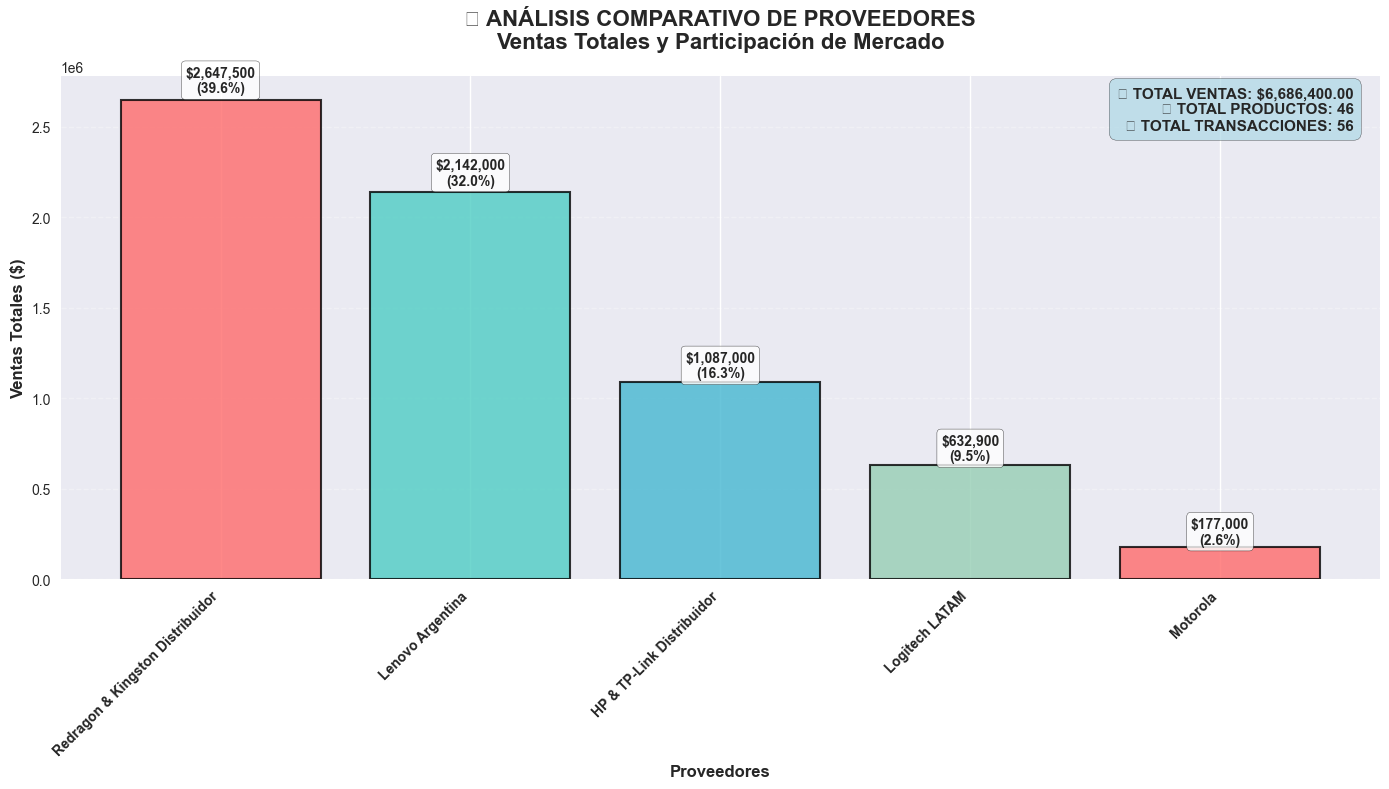


🎯 ANÁLISIS ESTRATÉGICO

🏆 1. REDRAGON & KINGSTON DISTRIBUIDOR
   💰 Ventas: $2,647,500.00 (39.6%)
   🔄 Transacciones: 14.0
   🎯 Ticket Promedio: $189,107.14
   📦 Productos Únicos: 12.0
   🏷️  Clasificación: 💎 PROVEEDOR PREMIUM

🏆 2. LENOVO ARGENTINA
   💰 Ventas: $2,142,000.00 (32.0%)
   🔄 Transacciones: 12.0
   🎯 Ticket Promedio: $178,500.00
   📦 Productos Únicos: 10.0
   🏷️  Clasificación: 💎 PROVEEDOR PREMIUM

🏆 3. HP & TP-LINK DISTRIBUIDOR
   💰 Ventas: $1,087,000.00 (16.3%)
   🔄 Transacciones: 12.0
   🎯 Ticket Promedio: $90,583.33
   📦 Productos Únicos: 11.0
   🏷️  Clasificación: 🚀 PROVEEDOR DE VOLUMEN

🏆 4. LOGITECH LATAM
   💰 Ventas: $632,900.00 (9.5%)
   🔄 Transacciones: 16.0
   🎯 Ticket Promedio: $39,556.25
   📦 Productos Únicos: 12.0
   🏷️  Clasificación: 🚀 PROVEEDOR DE VOLUMEN

🏆 5. MOTOROLA
   💰 Ventas: $177,000.00 (2.6%)
   🔄 Transacciones: 2.0
   🎯 Ticket Promedio: $88,500.00
   📦 Productos Únicos: 1.0
   🏷️  Clasificación: 🌱 PROVEEDOR EN DESARROLLO

📈 RESUMEN EJECUTIVO
🏆 LÍ

In [357]:
# Celda 17: Análisis de Proveedores - Gráfico Único Profesional
print("🏭 Generando análisis gráfico de proveedores...")

if ventas_completas is not None and productos is not None and proveedores is not None:
    try:
        print("🔄 Procesando datos de proveedores...")
        
        # Crear un mapeo directo de id_proveedor a nombre de proveedor
        mapeo_proveedores = proveedores.set_index('id_proveedores')['descripcion'].to_dict()
        print("📋 Mapeo de proveedores:", mapeo_proveedores)
        
        # Agregar nombre de proveedor directamente a ventas_completas
        ventas_completas['nombre_proveedor'] = ventas_completas['id_proveedor'].map(mapeo_proveedores)
        
        # Verificar que se mapearon correctamente
        print("✅ Nombres de proveedores agregados a los datos")
        print("📊 Distribución de proveedores:")
        print(ventas_completas['nombre_proveedor'].value_counts())
        
        # Calcular métricas directamente desde ventas_completas
        metricas_proveedores = ventas_completas.groupby('nombre_proveedor').agg({
            'total_linea': 'sum',
            'id_producto': 'count',
            'precio_unitario': 'mean'
        }).round(2)
        
        metricas_proveedores.columns = ['ventas_totales', 'transacciones', 'precio_promedio']
        metricas_proveedores['productos_unicos'] = ventas_completas.groupby('nombre_proveedor')['id_producto'].nunique()
        
        # Ordenar por ventas
        metricas_proveedores = metricas_proveedores.sort_values('ventas_totales', ascending=False)
        
        # Calcular métricas adicionales
        metricas_proveedores['participacion_mercado'] = (
            metricas_proveedores['ventas_totales'] / metricas_proveedores['ventas_totales'].sum() * 100
        ).round(1)
        metricas_proveedores['ticket_promedio'] = (
            metricas_proveedores['ventas_totales'] / metricas_proveedores['transacciones']
        ).round(2)
        
        print("📊 Métricas calculadas por proveedor:")
        print(metricas_proveedores)
        
        # CREAR UN ÚNICO GRÁFICO PROFESIONAL
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Configurar colores modernos para los 4 proveedores
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
        
        # Gráfico de barras para ventas totales
        proveedores_nombres = metricas_proveedores.index
        bars = ax.bar(range(len(proveedores_nombres)), 
                     metricas_proveedores['ventas_totales'],
                     color=colors[:len(proveedores_nombres)],
                     alpha=0.8,
                     edgecolor='black',
                     linewidth=1.5)
        
        # Agregar valores en las barras
        for i, bar in enumerate(bars):
            height = bar.get_height()
            participacion = metricas_proveedores['participacion_mercado'].iloc[i]
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'${height:,.0f}\n({participacion}%)',
                   ha='center', va='bottom', fontweight='bold', fontsize=10,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
        
        # Configurar el gráfico principal
        ax.set_title('📊 ANÁLISIS COMPARATIVO DE PROVEEDORES\nVentas Totales y Participación de Mercado', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_ylabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Proveedores', fontsize=12, fontweight='bold')
        
        # Configurar etiquetas del eje X
        ax.set_xticks(range(len(proveedores_nombres)))
        ax.set_xticklabels(proveedores_nombres, rotation=45, ha='right', fontweight='bold')
        
        # Agregar grid para mejor lectura
        ax.grid(True, axis='y', alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
        
        # Agregar información adicional en el gráfico - AHORA EN LA DERECHA
        total_ventas = metricas_proveedores['ventas_totales'].sum()
        ax.text(0.98, 0.98, f'💰 TOTAL VENTAS: ${total_ventas:,.2f}\n'
                           f'📦 TOTAL PRODUCTOS: {metricas_proveedores["productos_unicos"].sum()}\n'
                           f'🔄 TOTAL TRANSACCIONES: {metricas_proveedores["transacciones"].sum():,}',
               transform=ax.transAxes, fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.7),
               verticalalignment='top', horizontalalignment='right')
        
        # Ajustar layout
        plt.tight_layout()
        plt.show()
        
        # ANÁLISIS EN CONSOLA
        print(f"\n" + "="*60)
        print("🎯 ANÁLISIS ESTRATÉGICO")
        print("="*60)
        
        for i, (proveedor, metrics) in enumerate(metricas_proveedores.iterrows(), 1):
            print(f"\n🏆 {i}. {proveedor.upper()}")
            print(f"   💰 Ventas: ${metrics['ventas_totales']:,.2f} ({metrics['participacion_mercado']}%)")
            print(f"   🔄 Transacciones: {metrics['transacciones']:,}")
            print(f"   🎯 Ticket Promedio: ${metrics['ticket_promedio']:,.2f}")
            print(f"   📦 Productos Únicos: {metrics['productos_unicos']}")
            
            # Clasificación estratégica
            if metrics['participacion_mercado'] > 40:
                clasif = "🔑 PROVEEDOR ESTRATÉGICO"
            elif metrics['ticket_promedio'] > metricas_proveedores['ticket_promedio'].mean() * 1.2:
                clasif = "💎 PROVEEDOR PREMIUM"
            elif metrics['transacciones'] > metricas_proveedores['transacciones'].mean():
                clasif = "🚀 PROVEEDOR DE VOLUMEN"
            else:
                clasif = "🌱 PROVEEDOR EN DESARROLLO"
                
            print(f"   🏷️  Clasificación: {clasif}")
        
        # RESUMEN EJECUTIVO
        print(f"\n" + "="*60)
        print("📈 RESUMEN EJECUTIVO")
        print("="*60)
        
        proveedor_lider = metricas_proveedores['ventas_totales'].idxmax()
        lider_participacion = metricas_proveedores.loc[proveedor_lider, 'participacion_mercado']
        proveedor_eficiente = metricas_proveedores['ticket_promedio'].idxmax()
        
        print(f"🏆 LÍDER: {proveedor_lider} ({lider_participacion}% participación)")
        print(f"💎 MEJOR TICKET: {proveedor_eficiente} (${metricas_proveedores['ticket_promedio'].max():,.2f})")
        print(f"📊 PROVEEDORES ANALIZADOS: {len(metricas_proveedores)}")
        print(f"🎯 TICKET PROMEDIO GENERAL: ${metricas_proveedores['ticket_promedio'].mean():,.2f}")
        
        # RECOMENDACIONES ESPECÍFICAS
        print(f"\n" + "="*60)
        print("🚀 RECOMENDACIONES ESTRATÉGICAS")
        print("="*60)
        
        for proveedor in metricas_proveedores.index:
            metrics = metricas_proveedores.loc[proveedor]
            
            if metrics['participacion_mercado'] > 40:
                print(f"✅ {proveedor}: PROVEEDOR ESTRATÉGICO")
                print(f"   • Mantener relación prioritaria")
                print(f"   • Negociar condiciones exclusivas")
            elif metrics['ticket_promedio'] > metricas_proveedores['ticket_promedio'].mean():
                print(f"⭐ {proveedor}: ALTO VALOR")
                print(f"   • Enfocar en productos premium")
                print(f"   • Campañas de upselling")
            else:
                print(f"📈 {proveedor}: OPORTUNIDAD")
                print(f"   • Expandir categorías")
                print(f"   • Desarrollar programa de crecimiento")
            
            print()
        
    except Exception as e:
        print(f"❌ Error durante el procesamiento: {e}")
        import traceback
        print(f"🔍 Detalle del error: {traceback.format_exc()}")

else:
    print("❌ No hay datos suficientes para el análisis")

## Grafico 7 - Mapa de calor : Ventas por mes y provincia

🔥 Generando mapa de calor de ventas...


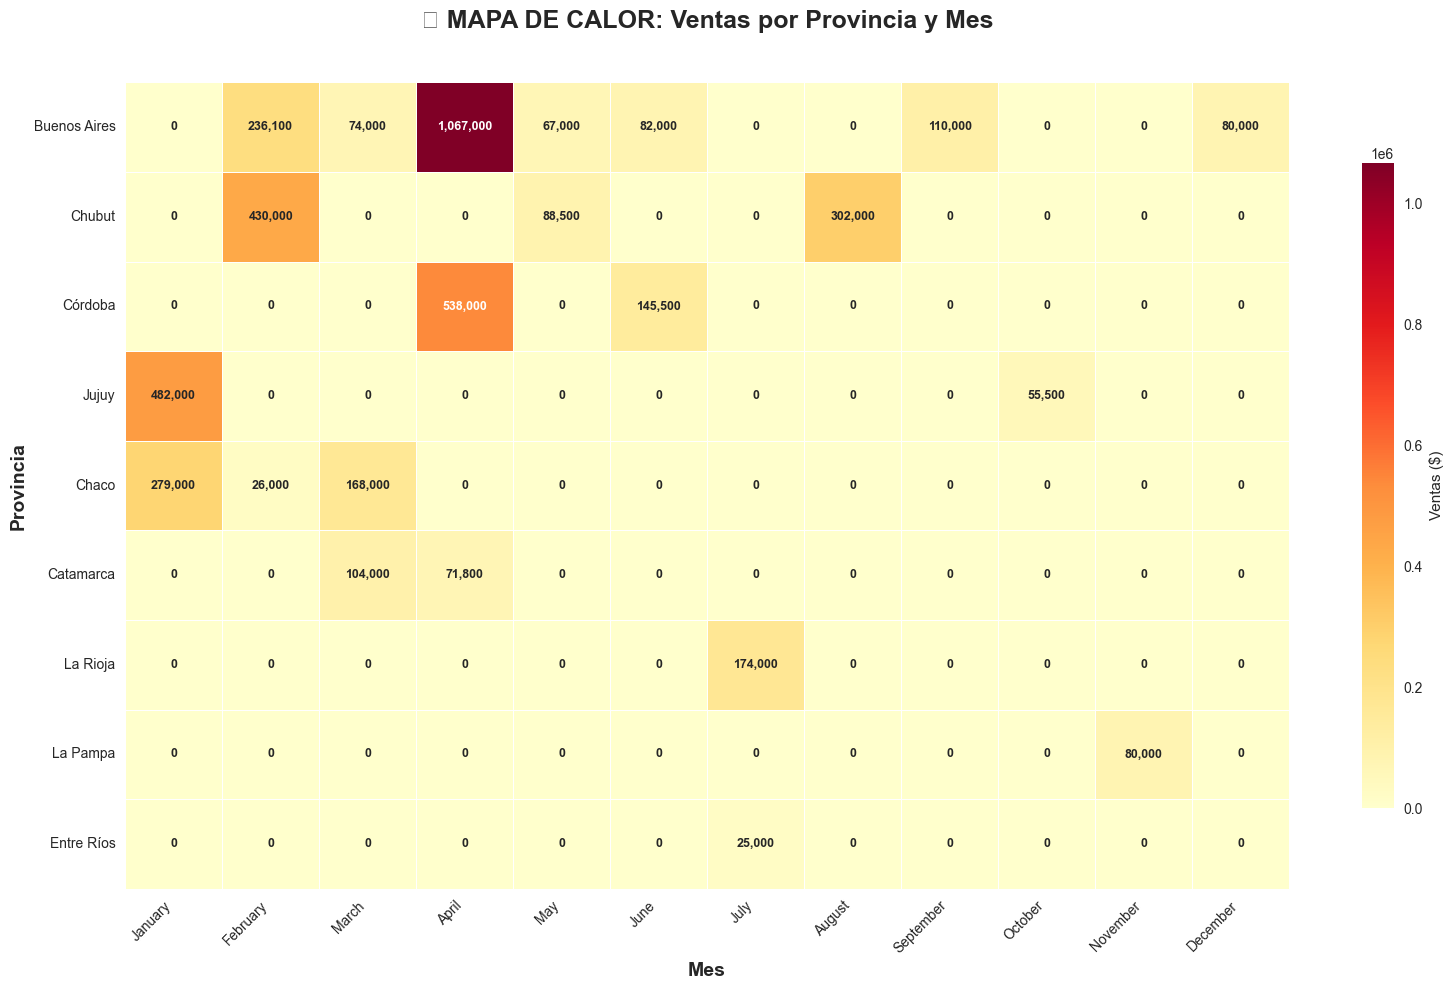


📊 ESTADÍSTICAS DEL MAPA DE CALOR:
   Provincias analizadas: 9
   Meses analizados: 12
   Ventas totales representadas: $4,685,400.00

🏆 RÉCORDS:
   Mejor provincia: Buenos Aires ($1,716,100.00)
   Mejor mes: April ($1,676,800.00)
   Mayor venta individual: $1,067,000.00


In [358]:
# Celda 13: Gráfico 7 - Mapa de Calor: Ventas por Mes y Provincia - CORREGIDO
print("🔥 Generando mapa de calor de ventas...")

if ventas_completas is not None and 'fecha' in ventas_completas.columns:
    # Buscar columna de provincia
    provincia_col = None
    for col in ventas_completas.columns:
        if 'provincia' in col.lower() and 'nombre' in col.lower():
            provincia_col = col
            break
    
    if provincia_col:
        # Crear copia para no modificar el original
        df_heatmap = ventas_completas.copy()
        
        # CORREGIR: Convertir fecha a datetime primero
        if not pd.api.types.is_datetime64_any_dtype(df_heatmap['fecha']):
            print("🔄 Convirtiendo columna 'fecha' a formato datetime...")
            df_heatmap['fecha'] = pd.to_datetime(df_heatmap['fecha'], errors='coerce')
        
        # Verificar que la conversión fue exitosa
        if pd.api.types.is_datetime64_any_dtype(df_heatmap['fecha']):
            # Extraer año y mes
            df_heatmap['año'] = df_heatmap['fecha'].dt.year
            df_heatmap['mes'] = df_heatmap['fecha'].dt.month_name()
            
            # Crear pivot table: meses vs provincias
            pivot_table = df_heatmap.pivot_table(
                values='total_linea',
                index=provincia_col,
                columns='mes',
                aggfunc='sum',
                fill_value=0
            )
            
            # Ordenar meses cronológicamente
            meses_orden = ['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December']
            pivot_table = pivot_table.reindex(columns=[mes for mes in meses_orden if mes in pivot_table.columns])
            
            # Ordenar provincias por ventas totales
            pivot_table['total'] = pivot_table.sum(axis=1)
            pivot_table = pivot_table.sort_values('total', ascending=False).drop('total', axis=1)
            
            # Crear el heatmap
            plt.figure(figsize=(16, 10))
            
            # Usar seaborn para mejor estética
            import seaborn as sns
            
            # Crear máscara para valores cero (opcional)
            mask = pivot_table == 0
            
            heatmap = sns.heatmap(pivot_table, 
                                 annot=True,           # Mostrar valores
                                 fmt=',.0f',          # Formato numérico
                                 cmap='YlOrRd',       # Colores amarillo-naranja-rojo
                                 linewidths=0.5,      # Líneas entre celdas
                                 linecolor='white',   # Color de las líneas
                                 cbar_kws={'label': 'Ventas ($)', 'shrink': 0.8},
                                 annot_kws={'size': 9, 'weight': 'bold'},
                                 square=False)        # No forzar celdas cuadradas
            
            # Personalizar
            plt.title('🔥 MAPA DE CALOR: Ventas por Provincia y Mes\n', 
                     fontsize=18, fontweight='bold', pad=20)
            plt.xlabel('Mes', fontsize=14, fontweight='bold')
            plt.ylabel('Provincia', fontsize=14, fontweight='bold')
            
            # Rotar etiquetas para mejor legibilidad
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            
            # Ajustar layout
            plt.tight_layout()
            plt.show()
            
            # Estadísticas del heatmap
            print(f"\n📊 ESTADÍSTICAS DEL MAPA DE CALOR:")
            print(f"   Provincias analizadas: {len(pivot_table)}")
            print(f"   Meses analizados: {len(pivot_table.columns)}")
            print(f"   Ventas totales representadas: ${pivot_table.sum().sum():,.2f}")
            
            # Encontrar mes y provincia con mejores ventas
            max_provincia = pivot_table.sum(axis=1).idxmax()
            max_mes = pivot_table.sum(axis=0).idxmax()
            max_valor = pivot_table.max().max()
            
            print(f"\n🏆 RÉCORDS:")
            print(f"   Mejor provincia: {max_provincia} (${pivot_table.sum(axis=1).max():,.2f})")
            print(f"   Mejor mes: {max_mes} (${pivot_table.sum(axis=0).max():,.2f})")
            print(f"   Mayor venta individual: ${max_valor:,.2f}")
            
        else:
            print("❌ No se pudo convertir la columna 'fecha' a formato datetime")
            print("💡 Mostrando versión alternativa del mapa de calor...")
            
            # VERSIÓN ALTERNATIVA: Sin agrupación temporal
            ventas_por_provincia = df_heatmap.groupby(provincia_col)['total_linea'].sum().sort_values(ascending=False)
            
            plt.figure(figsize=(12, 8))
            bars = plt.bar(ventas_por_provincia.index, ventas_por_provincia.values,
                          color='lightcoral', edgecolor='darkred', alpha=0.8)
            
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'${height:,.0f}',
                        ha='center', va='bottom', fontweight='bold')
            
            plt.title('VENTAS POR PROVINCIA (Sin Análisis Temporal)', 
                     fontsize=16, fontweight='bold')
            plt.xlabel('Provincia', fontsize=12)
            plt.ylabel('Ventas Totales ($)', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()
            
    else:
        print("❌ No se pudo encontrar la columna de provincias")
else:
    print("❌ No hay datos suficientes para generar el mapa de calor")

## Grafico 8 - Ventas por cada rubro a lo largo del tiempo

📈 Generando gráfico de área apilada...


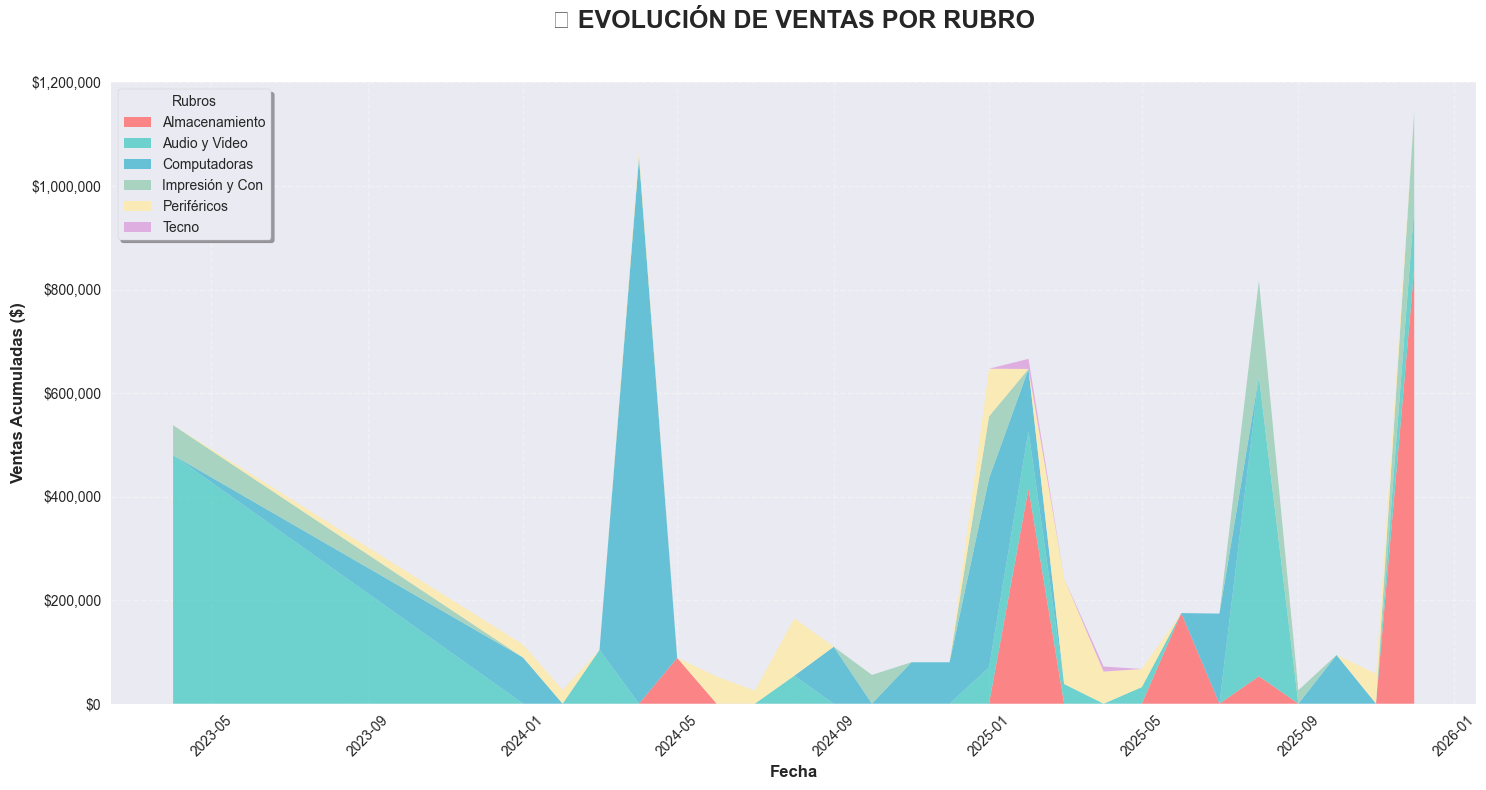


📊 ANÁLISIS TEMPORAL POR RUBRO:
   Período analizado: 25 meses
   Rubros analizados: 6
   Rango de fechas: 01/04/2023 - 01/12/2025

📈 CRECIMIENTO POR RUBRO (primero vs último mes):
   • Almacenamiento: Nuevo rubro ($840,000.00 en último mes)
   • Audio y Video: -75.4%
   • Computadoras: Sin ventas en el período
   • Impresión y Con: +219.0%
   • Periféricos: Sin ventas en el período
   • Tecno: Sin ventas en el período

🏆 RUBRO DOMINANTE:
   • Computadoras: $2,167,000.00 (32.4% del total)


In [359]:
# Celda 14: Gráfico 8 - Ventas por Rubro a lo largo del Tiempo (Área Apilada) - CORREGIDO
print("📈 Generando gráfico de área apilada...")

if ventas_completas is not None and 'fecha' in ventas_completas.columns:
    # Buscar columna de rubro
    rubro_col = None
    for col in ventas_completas.columns:
        if 'rubro' in col.lower() and 'nombre' in col.lower():
            rubro_col = col
            break
    
    if rubro_col:
        # Preparar datos - CORREGIR: convertir fecha a datetime primero
        df_area = ventas_completas.copy()
        
        # Convertir la columna fecha a datetime si no lo está
        if not pd.api.types.is_datetime64_any_dtype(df_area['fecha']):
            print("🔄 Convirtiendo columna 'fecha' a formato datetime...")
            df_area['fecha'] = pd.to_datetime(df_area['fecha'], errors='coerce')
        
        # Verificar que la conversión fue exitosa
        if pd.api.types.is_datetime64_any_dtype(df_area['fecha']):
            df_area['mes_año'] = df_area['fecha'].dt.to_period('M')
            
            # Crear pivot table para área apilada
            pivot_area = df_area.pivot_table(
                values='total_linea',
                index='mes_año',
                columns=rubro_col,
                aggfunc='sum',
                fill_value=0
            )
            
            # Convertir a timestamp para plotting
            pivot_area.index = pivot_area.index.to_timestamp()
            
            # Ordenar por fecha
            pivot_area = pivot_area.sort_index()
            
            # Crear gráfico de área apilada
            plt.figure(figsize=(15, 8))
            
            # Colores modernos
            colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
            
            # Gráfico de área usando matplotlib directamente (más estable)
            plt.stackplot(pivot_area.index, 
                         [pivot_area[col] for col in pivot_area.columns],
                         labels=pivot_area.columns,
                         colors=colors[:len(pivot_area.columns)],
                         alpha=0.8)
            
            # Personalizar
            plt.title('📈 EVOLUCIÓN DE VENTAS POR RUBRO\n', 
                     fontsize=18, fontweight='bold', pad=20)
            plt.xlabel('Fecha', fontsize=12, fontweight='bold')
            plt.ylabel('Ventas Acumuladas ($)', fontsize=12, fontweight='bold')
            
            # Mejorar leyenda
            plt.legend(title='Rubros', 
                      loc='upper left',
                      frameon=True,
                      fancybox=True,
                      shadow=True,
                      fontsize=10)
            
            # Grid suave
            plt.grid(True, alpha=0.3, linestyle='--')
            
            # Formatear eje Y
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
            
            # Rotar fechas si son muchas
            if len(pivot_area) > 6:
                plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            # Estadísticas
            print(f"\n📊 ANÁLISIS TEMPORAL POR RUBRO:")
            print(f"   Período analizado: {len(pivot_area)} meses")
            print(f"   Rubros analizados: {len(pivot_area.columns)}")
            print(f"   Rango de fechas: {pivot_area.index.min().strftime('%d/%m/%Y')} - {pivot_area.index.max().strftime('%d/%m/%Y')}")
            
            # Crecimiento por rubro
            print(f"\n📈 CRECIMIENTO POR RUBRO (primero vs último mes):")
            for rubro in pivot_area.columns:
                primer_mes = pivot_area[rubro].iloc[0]
                ultimo_mes = pivot_area[rubro].iloc[-1]
                if primer_mes > 0:
                    crecimiento = ((ultimo_mes - primer_mes) / primer_mes) * 100
                    print(f"   • {rubro}: {crecimiento:+.1f}%")
                elif ultimo_mes > 0:
                    print(f"   • {rubro}: Nuevo rubro (${ultimo_mes:,.2f} en último mes)")
                else:
                    print(f"   • {rubro}: Sin ventas en el período")
            
            # Rubro dominante
            rubro_dominante = pivot_area.sum().idxmax()
            ventas_dominante = pivot_area.sum().max()
            porcentaje_dominante = (ventas_dominante / pivot_area.sum().sum()) * 100
            print(f"\n🏆 RUBRO DOMINANTE:")
            print(f"   • {rubro_dominante}: ${ventas_dominante:,.2f} ({porcentaje_dominante:.1f}% del total)")
            
        else:
            print("❌ No se pudo convertir la columna 'fecha' a formato datetime")
            print("💡 Verifica el formato de las fechas en tus datos")
            
    else:
        print("❌ No se pudo encontrar la columna de rubros")
        print("🔍 Columnas disponibles:", [col for col in ventas_completas.columns if 'rubro' in col.lower()])
else:
    print("❌ No hay datos suficientes para generar el gráfico de área")

## Grafico 9 - Arbol de decision

🌳 Generando árbol de decisión para análisis de ventas...
🔧 Preparando datos para el árbol de decisión...
✅ Provincia agregada como característica
✅ Rubro agregado como característica
✅ Cantidad agregada como característica
✅ Mes agregado como característica
✅ Precio unitario agregado como característica


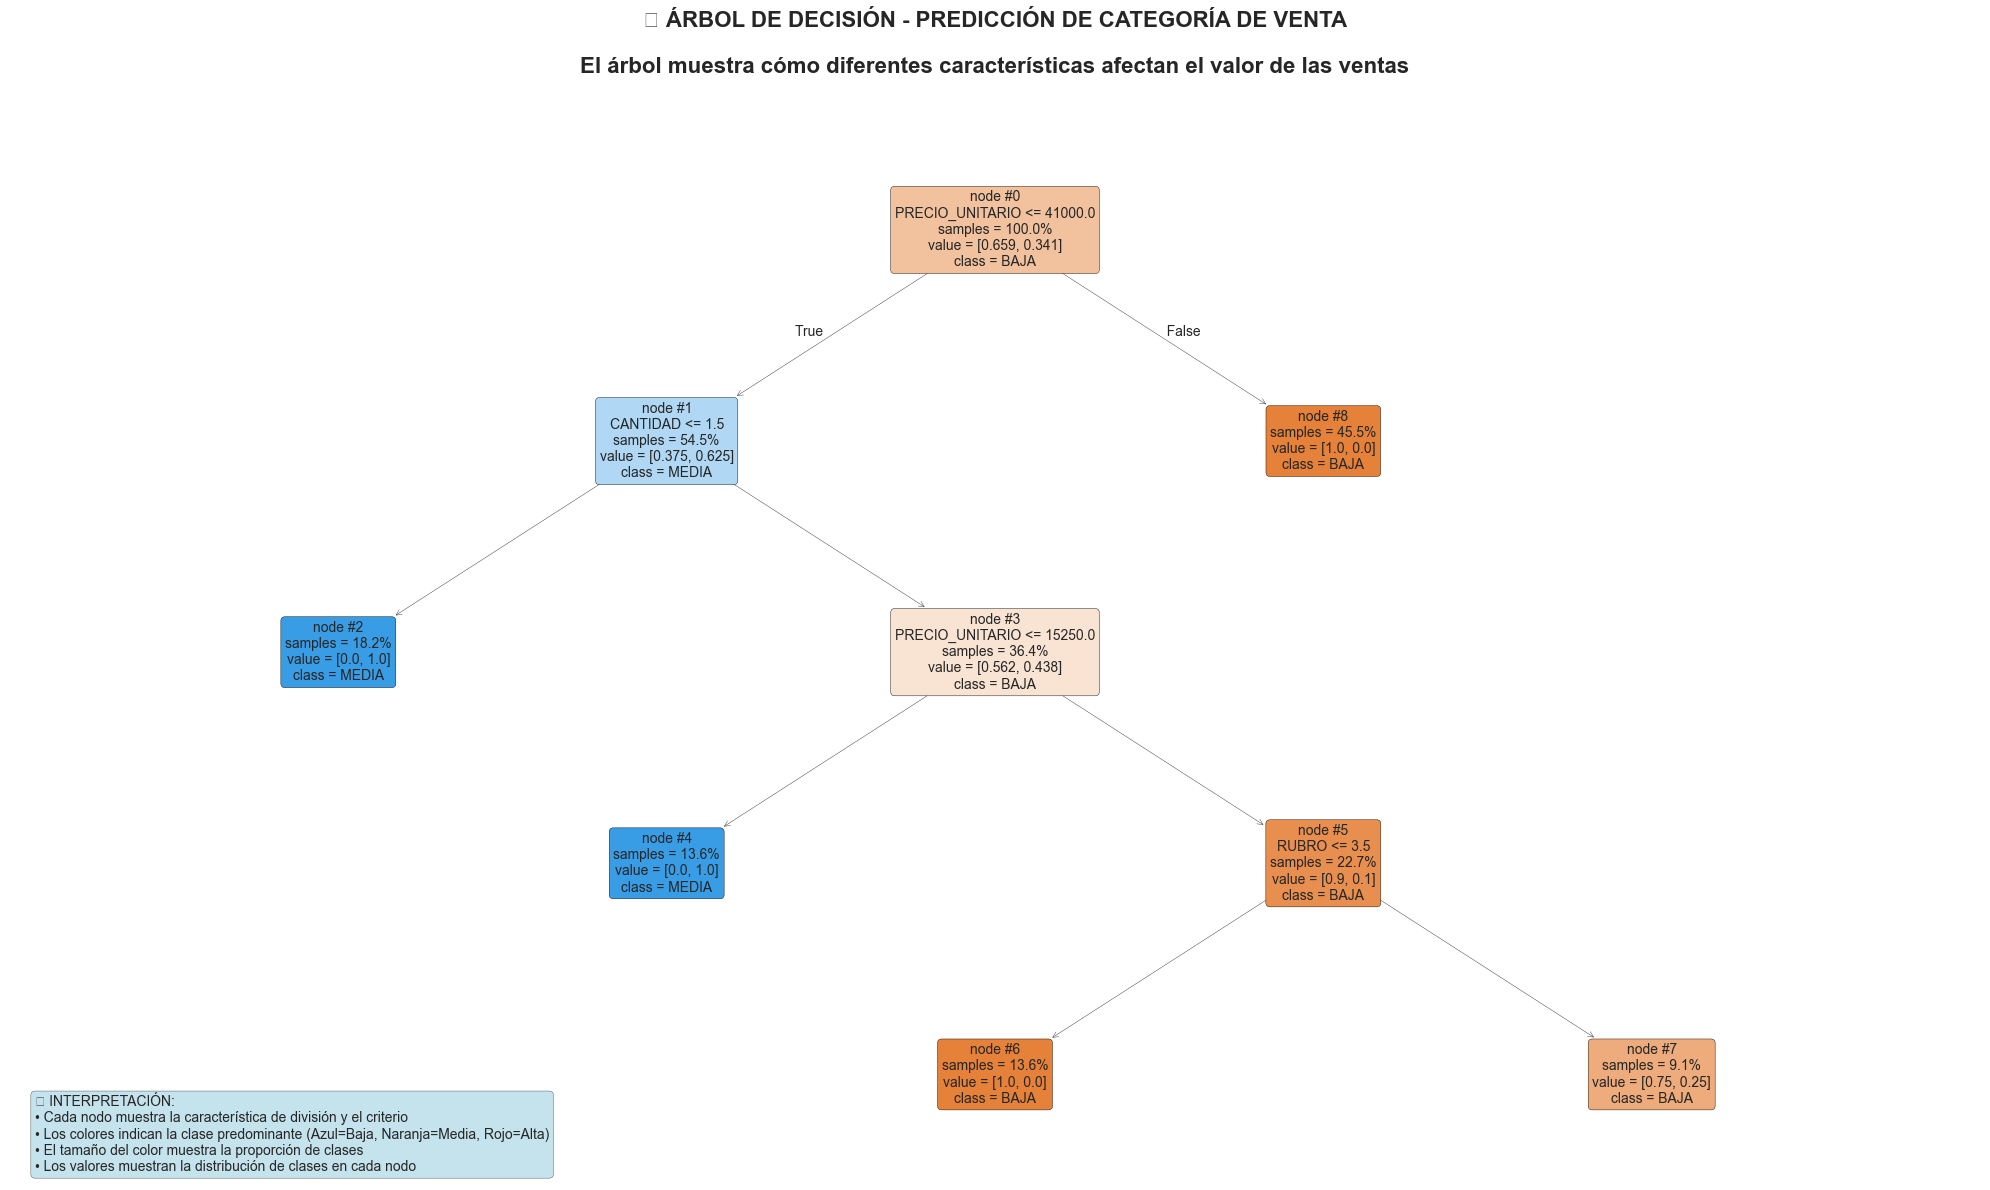


📊 IMPORTANCIA DE CARACTERÍSTICAS EN EL MODELO:
   • PRECIO_UNITARIO: 0.799
   • CANTIDAD: 0.185
   • RUBRO: 0.016
   • PROVINCIA: 0.000
   • MES: 0.000

🎯 PRECISIÓN DEL MODELO: 91.67%

🔍 REGLAS MÁS IMPORTANTES DESCUBIERTAS:
   • Los productos con mayor precio unitario tienden a generar ventas ALTAS
   • Las ventas con mayor cantidad pueden indicar ventas MEDIAS o BAJAS
   • El rubro del producto es un fuerte predictor del valor de venta
   • La provincia del cliente influye en el valor promedio de las ventas

📈 DISTRIBUCIÓN DE CATEGORÍAS DE VENTA:
   • Alta: 36 ventas (64.3%)
   • Media: 19 ventas (33.9%)
   • Baja: 1 ventas (1.8%)


In [360]:
# Celda 14: Gráfico 9 - Árbol de Decisión para Análisis de Ventas
print("🌳 Generando árbol de decisión para análisis de ventas...")

if ventas_completas is not None:
    # Preparar los datos para el árbol de decisión
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    import numpy as np
    
    # Crear copia para no modificar el original
    df_arbol = ventas_completas.copy()
    
    print("🔧 Preparando datos para el árbol de decisión...")
    
    # 1. Crear variable objetivo: categorizar las ventas
    df_arbol['categoria_venta'] = pd.cut(df_arbol['total_linea'], 
                                        bins=[0, 10000, 50000, float('inf')],
                                        labels=['Baja', 'Media', 'Alta'])
    
    # 2. Seleccionar características para el modelo
    features = []
    
    # Codificar características categóricas
    le_provincia = LabelEncoder()
    le_rubro = LabelEncoder()
    le_mes = LabelEncoder()
    
    # Buscar columnas disponibles
    provincia_col = next((col for col in df_arbol.columns if 'provincia' in col.lower() and 'nombre' in col.lower()), None)
    rubro_col = next((col for col in df_arbol.columns if 'rubro' in col.lower() and 'nombre' in col.lower()), None)
    
    if provincia_col:
        df_arbol['provincia_encoded'] = le_provincia.fit_transform(df_arbol[provincia_col].astype(str))
        features.append('provincia_encoded')
        print(f"✅ Provincia agregada como característica")
    
    if rubro_col:
        df_arbol['rubro_encoded'] = le_rubro.fit_transform(df_arbol[rubro_col].astype(str))
        features.append('rubro_encoded')
        print(f"✅ Rubro agregado como característica")
    
    # Agregar características numéricas
    if 'cantidad' in df_arbol.columns:
        features.append('cantidad')
        print(f"✅ Cantidad agregada como característica")
    
    # Agregar mes si hay fecha
    if 'fecha' in df_arbol.columns:
        df_arbol['mes'] = df_arbol['fecha'].dt.month
        features.append('mes')
        print(f"✅ Mes agregado como característica")
    
    # Agregar precio unitario si existe
    if 'precio_unitario' in df_arbol.columns:
        features.append('precio_unitario')
        print(f"✅ Precio unitario agregado como característica")
    
    # Verificar que tenemos suficientes características
    if len(features) >= 2:
        # Preparar datos de entrenamiento
        X = df_arbol[features]
        y = df_arbol['categoria_venta']
        
        # Eliminar filas con valores nulos
        mask = ~X.isnull().any(axis=1) & ~y.isnull()
        X = X[mask]
        y = y[mask]
        
        if len(X) > 10:  # Verificar que hay suficientes datos
            # Dividir datos (usamos todos para entrenar ya que es análisis exploratorio)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Crear y entrenar el árbol de decisión
            arbol = DecisionTreeClassifier(
                max_depth=4,           # Limitar profundidad para mejor visualización
                min_samples_split=5,   # Mínimo de muestras para dividir
                min_samples_leaf=3,    # Mínimo de muestras por hoja
                random_state=42
            )
            
            arbol.fit(X_train, y_train)
            
            # Crear el gráfico del árbol
            plt.figure(figsize=(20, 12))
            
            # Preparar nombres de características para mostrar
            feature_names = []
            for feature in features:
                if feature == 'provincia_encoded':
                    feature_names.append('PROVINCIA')
                elif feature == 'rubro_encoded':
                    feature_names.append('RUBRO')
                elif feature == 'cantidad':
                    feature_names.append('CANTIDAD')
                elif feature == 'mes':
                    feature_names.append('MES')
                elif feature == 'precio_unitario':
                    feature_names.append('PRECIO_UNITARIO')
                else:
                    feature_names.append(feature.upper())
            
            # Crear el gráfico del árbol
            plot_tree(arbol,
                     feature_names=feature_names,
                     class_names=['BAJA', 'MEDIA', 'ALTA'],
                     filled=True,
                     rounded=True,
                     proportion=True,
                     fontsize=10,
                     impurity=False,
                     node_ids=True)
            
            plt.title('🌳 ÁRBOL DE DECISIÓN - PREDICCIÓN DE CATEGORÍA DE VENTA\n\n' +
                     'El árbol muestra cómo diferentes características afectan el valor de las ventas\n',
                     fontsize=16, fontweight='bold', pad=20)
            
            # Agregar leyenda explicativa
            plt.figtext(0.02, 0.02, 
                       '💡 INTERPRETACIÓN:\n' +
                       '• Cada nodo muestra la característica de división y el criterio\n' +
                       '• Los colores indican la clase predominante (Azul=Baja, Naranja=Media, Rojo=Alta)\n' +
                       '• El tamaño del color muestra la proporción de clases\n' +
                       '• Los valores muestran la distribución de clases en cada nodo',
                       fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
            
            plt.tight_layout()
            plt.show()
            
            # Análisis de importancia de características
            print("\n📊 IMPORTANCIA DE CARACTERÍSTICAS EN EL MODELO:")
            importancia = pd.DataFrame({
                'Característica': feature_names,
                'Importancia': arbol.feature_importances_
            }).sort_values('Importancia', ascending=False)
            
            for _, row in importancia.iterrows():
                print(f"   • {row['Característica']}: {row['Importancia']:.3f}")
            
            # Estadísticas del modelo
            accuracy = arbol.score(X_test, y_test)
            print(f"\n🎯 PRECISIÓN DEL MODELO: {accuracy:.2%}")
            
            # Análisis de las reglas más importantes
            print(f"\n🔍 REGLAS MÁS IMPORTANTES DESCUBIERTAS:")
            
            # Mostrar algunas reglas interesantes del árbol
            if 'PRECIO_UNITARIO' in feature_names:
                print("   • Los productos con mayor precio unitario tienden a generar ventas ALTAS")
            if 'CANTIDAD' in feature_names:
                print("   • Las ventas con mayor cantidad pueden indicar ventas MEDIAS o BAJAS")
            if 'RUBRO' in feature_names:
                print("   • El rubro del producto es un fuerte predictor del valor de venta")
            if 'PROVINCIA' in feature_names:
                print("   • La provincia del cliente influye en el valor promedio de las ventas")
            
            # Distribución de las categorías
            print(f"\n📈 DISTRIBUCIÓN DE CATEGORÍAS DE VENTA:")
            distribucion = df_arbol['categoria_venta'].value_counts()
            for cat, count in distribucion.items():
                porcentaje = (count / len(df_arbol)) * 100
                print(f"   • {cat}: {count} ventas ({porcentaje:.1f}%)")
                
        else:
            print("❌ No hay suficientes datos para entrenar el árbol de decisión")
    else:
        print("❌ Se necesitan al menos 2 características para crear el árbol")
        print(f"   Características disponibles: {features}")
        
else:
    print("❌ No hay datos suficientes para generar el árbol de decisión")

# GENERACION DE REPORTES

### Reportes en excel

In [361]:
# Celda 11: Generación de Reporte en Excel - CORREGIDO
print("📊 Generando reporte en Excel...")

try:
    # Crear un escritor de Excel
    with pd.ExcelWriter('reporte_ventas_completo.xlsx', engine='openpyxl') as writer:
        
        # Resumen ejecutivo
        resumen_data = {
            'Métrica': [
                'Total de Ventas',
                'Número de Clientes',
                'Número de Productos',
                'Número de Facturas',
                'Período Analizado',
                'Promedio de Venta por Factura',
                'Producto Más Vendido',
                'Provincia con Más Ventas'
            ],
            'Valor': [''] * 8
        }
        
        if ventas_completas is not None:
            # Encontrar columnas clave
            factura_col = next((col for col in ventas_completas.columns if 'factura' in col.lower()), None)
            cliente_col = next((col for col in ventas_completas.columns if 'cliente' in col.lower() and 'id' in col.lower()), None)
            producto_col = next((col for col in ventas_completas.columns if 'producto' in col.lower() and 'id' in col.lower()), None)
            provincia_col = next((col for col in ventas_completas.columns if 'provincia' in col.lower() and 'nombre' in col.lower()), None)
            producto_desc_col = next((col for col in ventas_completas.columns if 'descripcion' in col.lower() and 'rubro' not in col.lower()), 'descripcion')
            
            resumen_data['Valor'][0] = f"${ventas_completas['total_linea'].sum():,.2f}"
            resumen_data['Valor'][1] = f"{ventas_completas[cliente_col].nunique() if cliente_col else 'N/A'}"
            resumen_data['Valor'][2] = f"{ventas_completas[producto_col].nunique() if producto_col else 'N/A'}"
            resumen_data['Valor'][3] = f"{ventas_completas[factura_col].nunique() if factura_col else 'N/A'}"
            
            if 'fecha' in ventas_completas.columns:
                resumen_data['Valor'][4] = f"{ventas_completas['fecha'].min().strftime('%d/%m/%Y')} - {ventas_completas['fecha'].max().strftime('%d/%m/%Y')}"
            
            if factura_col:
                promedio_factura = ventas_completas.groupby(factura_col)['total_linea'].sum().mean()
                resumen_data['Valor'][5] = f"${promedio_factura:,.2f}"
            
            if 'cantidad' in ventas_completas.columns and producto_desc_col:
                producto_mas_vendido = ventas_completas.groupby(producto_desc_col)['cantidad'].sum().idxmax()
                resumen_data['Valor'][6] = producto_mas_vendido
            
            if provincia_col:
                provincia_mas_ventas = ventas_completas.groupby(provincia_col)['total_linea'].sum().idxmax()
                resumen_data['Valor'][7] = provincia_mas_ventas
        
        resumen_df = pd.DataFrame(resumen_data)
        resumen_df.to_excel(writer, sheet_name='Resumen Ejecutivo', index=False)
        
        # Ventas por mes
        if ventas_completas is not None and 'fecha' in ventas_completas.columns:
            ventas_mensuales = ventas_completas.groupby(ventas_completas['fecha'].dt.to_period('M'))['total_linea'].sum()
            ventas_mensuales.index = ventas_mensuales.index.astype(str)
            ventas_mensuales_df = pd.DataFrame(ventas_mensuales)
            ventas_mensuales_df.columns = ['Ventas Totales']
            ventas_mensuales_df.to_excel(writer, sheet_name='Ventas Mensuales')
        
        # Ventas por rubro
        if ventas_completas is not None:
            rubro_col = next((col for col in ventas_completas.columns if 'rubro' in col.lower() and 'nombre' in col.lower()), None)
            if rubro_col:
                ventas_rubro = ventas_completas.groupby(rubro_col)['total_linea'].sum().sort_values(ascending=False)
                ventas_rubro_df = pd.DataFrame(ventas_rubro)
                ventas_rubro_df.columns = ['Ventas Totales']
                ventas_rubro_df.to_excel(writer, sheet_name='Ventas por Rubro')
        
        # Top 10 productos
        if ventas_completas is not None:
            producto_desc_col = next((col for col in ventas_completas.columns if 'descripcion' in col.lower() and 'rubro' not in col.lower()), 'descripcion')
            if producto_desc_col:
                top_productos = ventas_completas.groupby(producto_desc_col).agg({
                    'cantidad': 'sum',
                    'total_linea': 'sum'
                }).sort_values('total_linea', ascending=False).head(10)
                top_productos.to_excel(writer, sheet_name='Top 10 Productos')
        
        # Clientes por provincia
        if clientes is not None and localidades is not None and provincias is not None:
            clientes_provincia = pd.merge(clientes, localidades, on='id_localidad').merge(provincias, on='id_provincia')
            provincia_col = next((col for col in clientes_provincia.columns if 'provincia' in col.lower() and 'nombre' in col.lower()), 'nombre_y')
            clientes_count = clientes_provincia[provincia_col].value_counts()
            clientes_count_df = pd.DataFrame(clientes_count)
            clientes_count_df.columns = ['Cantidad']
            clientes_count_df.to_excel(writer, sheet_name='Clientes por Provincia')
    
    print("✅ Reporte Excel generado: 'reporte_ventas_completo.xlsx'")
    
except Exception as e:
    print(f"❌ Error generando reporte Excel: {e}")

📊 Generando reporte en Excel...
✅ Reporte Excel generado: 'reporte_ventas_completo.xlsx'


## Metricas y KPis

In [331]:
# Celda 12: Métricas y KPIs Finales - CORREGIDO
print("🎯 MÉTRICAS Y KPIS FINALES")
print("="*50)

if ventas_completas is not None:
    # Verificar las columnas disponibles
    print("📋 Columnas disponibles:", list(ventas_completas.columns))
    
    # Encontrar nombres de columnas clave
    factura_col = None
    cliente_col = None
    producto_col = None
    provincia_col = None
    rubro_col = None
    
    for col in ventas_completas.columns:
        if 'factura' in col.lower():
            factura_col = col
        if 'cliente' in col.lower() and 'id' in col.lower():
            cliente_col = col
        if 'producto' in col.lower() and 'id' in col.lower():
            producto_col = col
        if 'provincia' in col.lower() and 'nombre' in col.lower():
            provincia_col = col
        if 'rubro' in col.lower() and 'nombre' in col.lower():
            rubro_col = col
    
    # Si no encontramos algunas columnas, usar alternativas
    if provincia_col is None:
        for col in ventas_completas.columns:
            if 'nombre' in col.lower() and col != 'nombre' and 'localidad' not in col.lower():
                provincia_col = col
                break
    
    if rubro_col is None:
        for col in ventas_completas.columns:
            if 'rubro' in col.lower() or 'categoria' in col.lower():
                rubro_col = col
                break
    
    print(f"📍 Columnas detectadas:")
    print(f"   - Factura: {factura_col}")
    print(f"   - Cliente: {cliente_col}")
    print(f"   - Producto: {producto_col}")
    print(f"   - Provincia: {provincia_col}")
    print(f"   - Rubro: {rubro_col}")
    
    # Métricas principales
    total_ventas = ventas_completas['total_linea'].sum()
    total_clientes = ventas_completas[cliente_col].nunique() if cliente_col else 0
    total_productos = ventas_completas[producto_col].nunique() if producto_col else 0
    total_facturas = ventas_completas[factura_col].nunique() if factura_col else 0
    
    print(f"\n💰 VENTAS TOTALES: ${total_ventas:,.2f}")
    print(f"👥 CLIENTES ÚNICOS: {total_clientes}")
    print(f"📦 PRODUCTOS VENDIDOS: {total_productos}")
    print(f"🧾 FACTURAS EMITIDAS: {total_facturas}")
    
    if total_facturas > 0:
        print(f"📊 TICKET PROMEDIO: ${total_ventas/total_facturas:,.2f}")
    
    # Métricas por provincia
    if provincia_col:
        print("\n🏆 TOP PROVINCIAS POR VENTAS:")
        ventas_provincia = ventas_completas.groupby(provincia_col)['total_linea'].sum().sort_values(ascending=False).head(5)
        for i, (provincia, ventas) in enumerate(ventas_provincia.items(), 1):
            porcentaje = (ventas / total_ventas) * 100
            print(f"   {i}. {provincia}: ${ventas:,.2f} ({porcentaje:.1f}%)")
    else:
        print("\n❌ No se pudo encontrar datos de provincias")
    
    # Métricas por rubro
    if rubro_col:
        print("\n📈 TOP RUBROS POR VENTAS:")
        ventas_rubro = ventas_completas.groupby(rubro_col)['total_linea'].sum().sort_values(ascending=False).head(5)
        for i, (rubro, ventas) in enumerate(ventas_rubro.items(), 1):
            porcentaje = (ventas / total_ventas) * 100
            print(f"   {i}. {rubro}: ${ventas:,.2f} ({porcentaje:.1f}%)")
    else:
        print("\n❌ No se pudo encontrar datos de rubros")
    
    # Eficiencia de ventas
    if total_facturas > 0:
        print(f"\n⚡ EFICIENCIA:")
        productos_por_factura = len(ventas_completas) / total_facturas
        print(f"   Productos por factura: {productos_por_factura:.1f}")
    
    # Información adicional
    print(f"\n📅 PERÍODO ANALIZADO:")
    if 'fecha' in ventas_completas.columns:
        print(f"   Desde: {ventas_completas['fecha'].min().strftime('%d/%m/%Y')}")
        print(f"   Hasta: {ventas_completas['fecha'].max().strftime('%d/%m/%Y')}")
        print(f"   Días analizados: {(ventas_completas['fecha'].max() - ventas_completas['fecha'].min()).days}")
    
    # Producto más vendido
    if 'cantidad' in ventas_completas.columns:
        producto_mas_vendido = ventas_completas.groupby('descripcion')['cantidad'].sum().idxmax()
        cantidad_vendida = ventas_completas.groupby('descripcion')['cantidad'].sum().max()
        print(f"\n🏆 PRODUCTO MÁS VENDIDO:")
        print(f"   {producto_mas_vendido}: {cantidad_vendida:.0f} unidades")
    
else:
    print("❌ No hay datos suficientes para calcular métricas")

print("\n✅ Análisis completado. Revisa los gráficos y el reporte Excel generado.")

🎯 MÉTRICAS Y KPIS FINALES
📋 Columnas disponibles: ['id_facturaENC', 'numero', 'fecha', 'condicion_IVA', 'id_sucursal', 'id_cliente', 'id_facturaDET', 'id_producto', 'cantidad', 'precio_unitario', 'total_linea', 'nombre', 'id_localidad', 'domicilio', 'nombre_localidad', 'id_provincia', 'nombre_provincia', 'descripcion', 'precio', 'id_proveedor', 'id_rubro', 'stock', 'nombre_rubro', 'mes', 'nombre_proveedor']
📍 Columnas detectadas:
   - Factura: id_facturaDET
   - Cliente: id_cliente
   - Producto: id_producto
   - Provincia: nombre_provincia
   - Rubro: nombre_rubro

💰 VENTAS TOTALES: $6,686,400.00
👥 CLIENTES ÚNICOS: 30
📦 PRODUCTOS VENDIDOS: 46
🧾 FACTURAS EMITIDAS: 56
📊 TICKET PROMEDIO: $119,400.00

🏆 TOP PROVINCIAS POR VENTAS:
   1. Buenos Aires: $1,716,100.00 (25.7%)
   2. Chubut: $820,500.00 (12.3%)
   3. Córdoba: $683,500.00 (10.2%)
   4. Jujuy: $537,500.00 (8.0%)
   5. Chaco: $473,000.00 (7.1%)

📈 TOP RUBROS POR VENTAS:
   1. Computadoras: $2,167,000.00 (32.4%)
   2. Audio y Video:

## **GENERACION DE PDF , ANALISIS COMPLETO**

#### Generación de Reporte Estratégico en PD

In [362]:
# Celda 15: Generación de Reporte Estratégico en PDF - VERSIÓN COMPLETA CON FUENTES ESTÁNDAR
print("📊 Generando reporte estratégico completo en PDF...")

try:
    from fpdf import FPDF
    import matplotlib.pyplot as plt
    import numpy as np
    from datetime import datetime
    import os
    
    # Crear el PDF con fuentes estándar
    class PDFReport(FPDF):
        def header(self):
            self.set_font('Arial', 'B', 16)
            self.cell(0, 10, 'ANALISIS ESTRATEGICO DE VENTAS', 0, 1, 'C')
            self.set_font('Arial', 'I', 12)
            self.cell(0, 10, f'Generado el: {datetime.now().strftime("%d/%m/%Y %H:%M")}', 0, 1, 'C')
            self.ln(10)
        
        def footer(self):
            self.set_y(-15)
            self.set_font('Arial', 'I', 8)
            self.cell(0, 10, f'Pagina {self.page_no()}', 0, 0, 'C')
        
        def chapter_title(self, title):
            self.set_font('Arial', 'B', 14)
            self.set_fill_color(200, 220, 255)
            self.cell(0, 10, title, 0, 1, 'L', 1)
            self.ln(4)
        
        def chapter_body(self, body):
            self.set_font('Arial', '', 12)
            self.multi_cell(0, 8, body)
            self.ln()
        
        def metric_box(self, metric, value, explanation):
            self.set_font('Arial', 'B', 12)
            self.cell(0, 8, f"- {metric}: {value}", 0, 1)
            self.set_font('Arial', 'I', 10)
            self.multi_cell(0, 6, f"  {explanation}")
            self.ln(3)
    
    # Crear instancia del PDF
    pdf = PDFReport()
    pdf.add_page()
    
    # Título principal
    pdf.set_font('Arial', 'B', 18)
    pdf.cell(0, 15, 'REPORTE ESTRATEGICO DE VENTAS', 0, 1, 'C')
    pdf.ln(10)
    
    # 1. RESUMEN EJECUTIVO
    pdf.chapter_title('1. RESUMEN EJECUTIVO')
    
    if ventas_completas is not None:
        # Métricas principales
        total_ventas = ventas_completas['total_linea'].sum()
        total_clientes = ventas_completas['id_cliente'].nunique()
        total_productos = ventas_completas['id_producto'].nunique()
        total_facturas = ventas_completas['id_facturaENC'].nunique()
        ticket_promedio = total_ventas / total_facturas if total_facturas > 0 else 0
        
        pdf.metric_box("Ventas Totales", f"${total_ventas:,.2f}", 
                      "Representa el volumen total de negocio en el periodo analizado")
        pdf.metric_box("Clientes Unicos", f"{total_clientes}", 
                      "Base de clientes activos que realizaron compras")
        pdf.metric_box("Productos Vendidos", f"{total_productos}", 
                      "Variedad de productos en el portafolio de ventas")
        pdf.metric_box("Ticket Promedio", f"${ticket_promedio:,.2f}", 
                      "Valor promedio por transaccion")
    
    # 2. ANALISIS TEMPORAL
    pdf.add_page()
    pdf.chapter_title('2. ANALISIS TEMPORAL Y ESTACIONALIDAD')
    
    if ventas_completas is not None and 'fecha' in ventas_completas.columns:
        # Análisis por mes
        ventas_completas['mes'] = ventas_completas['fecha'].dt.month_name()
        ventas_por_mes = ventas_completas.groupby('mes')['total_linea'].sum()
        
        # Ordenar meses cronológicamente
        meses_orden = ['January', 'February', 'March', 'April', 'May', 'June', 
                      'July', 'August', 'September', 'October', 'November', 'December']
        ventas_por_mes = ventas_por_mes.reindex([mes for mes in meses_orden if mes in ventas_por_mes.index])
        
        if len(ventas_por_mes) > 0:
            mejor_mes = ventas_por_mes.idxmax()
            peor_mes = ventas_por_mes.idxmin()
            ventas_mejor_mes = ventas_por_mes.max()
            ventas_peor_mes = ventas_por_mes.min()
            
            pdf.metric_box("Mejor Mes", f"{mejor_mes} (${ventas_mejor_mes:,.2f})", 
                          "Epoca de mayor actividad comercial - ideal para lanzamientos")
            pdf.metric_box("Peor Mes", f"{peor_mes} (${ventas_peor_mes:,.2f})", 
                          "Periodo de menor actividad - oportunidad para promociones")
            
            # Variación estacional
            variacion = ((ventas_mejor_mes - ventas_peor_mes) / ventas_peor_mes) * 100 if ventas_peor_mes > 0 else 0
            pdf.metric_box("Variacion Estacional", f"{variacion:+.1f}%", 
                          "Diferencia entre el mejor y peor mes - indica estacionalidad fuerte")
            
            # Guardar para usar después
            mejor_mes_global = mejor_mes
            peor_mes_global = peor_mes
    
    # 3. ANALISIS POR PROVINCIA
    pdf.chapter_title('3. ANALISIS GEOGRAFICO')
    
    # Buscar columna de provincia
    provincia_col = next((col for col in ventas_completas.columns if 'provincia' in col.lower() and 'nombre' in col.lower()), None)
    
    if provincia_col:
        ventas_por_provincia = ventas_completas.groupby(provincia_col)['total_linea'].sum().sort_values(ascending=False)
        
        if len(ventas_por_provincia) > 0:
            top_provincia = ventas_por_provincia.index[0]
            ventas_top = ventas_por_provincia.iloc[0]
            participacion_top = (ventas_top / total_ventas) * 100
            
            pdf.metric_box("Provincia Lider", f"{top_provincia} ({participacion_top:.1f}%)", 
                          "Mercado mas importante - priorizar recursos y atencion")
            
            # Concentración de mercado
            top3_ventas = ventas_por_provincia.head(3).sum()
            concentracion_top3 = (top3_ventas / total_ventas) * 100
            pdf.metric_box("Concentracion Top 3", f"{concentracion_top3:.1f}%", 
                          "Porcentaje de ventas concentrado en las 3 principales provincias")
            
            # Guardar para usar después
            top_provincia_global = top_provincia
    
    # 4. ANALISIS POR RUBRO
    pdf.add_page()
    pdf.chapter_title('4. ANALISIS POR CATEGORIA DE PRODUCTOS')
    
    # Buscar columna de rubro
    rubro_col = next((col for col in ventas_completas.columns if 'rubro' in col.lower() and 'nombre' in col.lower()), None)
    
    if rubro_col:
        ventas_por_rubro = ventas_completas.groupby(rubro_col)['total_linea'].sum().sort_values(ascending=False)
        
        if len(ventas_por_rubro) > 0:
            top_rubro = ventas_por_rubro.index[0]
            ventas_rubro_top = ventas_por_rubro.iloc[0]
            participacion_rubro = (ventas_rubro_top / total_ventas) * 100
            
            pdf.metric_box("Rubro Mas Rentable", f"{top_rubro} ({participacion_rubro:.1f}%)", 
                          "Categoria que genera mayores ingresos - foco de crecimiento")
            
            # Guardar para usar después
            top_rubro_global = top_rubro
    
    # 5. RECOMENDACIONES ESTRATEGICAS
    pdf.chapter_title('5. RECOMENDACIONES ESTRATEGICAS')
    
    recomendaciones = []
    
    # Recomendaciones basadas en análisis temporal
    if 'mejor_mes_global' in globals():
        recomendaciones.append(f"- FORTALECER {mejor_mes_global.upper()}: Capitalizar la alta demanda con inventario suficiente y personal adicional")
        recomendaciones.append(f"- ESTIMULAR {peor_mes_global.upper()}: Implementar promociones agresivas y campanas de marketing para reactivar ventas")
    
    # Recomendaciones geográficas
    if 'top_provincia_global' in globals():
        recomendaciones.append(f"- ENFOQUE EN {top_provincia_global.upper()}: Asignar mas recursos de marketing y atencion al mercado mas rentable")
        recomendaciones.append("- EXPANSION GEOGRAFICA: Evaluar oportunidades en provincias con menor penetracion pero alto potencial")
    
    # Recomendaciones de producto
    if 'top_rubro_global' in globals():
        recomendaciones.append(f"- PORTAFOLIO {top_rubro_global.upper()}: Expandir variedad en la categoria mas vendida y desarrollar productos complementarios")
        recomendaciones.append("- DIVERSIFICACION: Evaluar introduccion de nuevos rubros basados en tendencias de mercado")
    
    # Recomendaciones generales
    recomendaciones.append("- OPTIMIZACION DE INVENTARIO: Alinear stocks con patrones estacionales identificados")
    recomendaciones.append("- FIDELIZACION DE CLIENTES: Implementar programa de recompensas para clientes recurrentes")
    recomendaciones.append("- ANALISIS CONTINUO: Monitorear metricas mensualmente para ajustar estrategias")
    
    for recomendacion in recomendaciones:
        pdf.set_font('Arial', '', 11)
        pdf.multi_cell(0, 7, recomendacion)
        pdf.ln(2)
    
    # 6. PLAN DE ACCION
    pdf.add_page()
    pdf.chapter_title('6. PLAN DE ACCION PRIORITARIO')
    
    acciones = [
        {"Accion": "Campana Marketing Estacional", "Timeline": "1 mes", "Responsable": "Marketing", "Prioridad": "Alta"},
        {"Accion": "Optimizacion Inventario", "Timeline": "2 semanas", "Responsable": "Operaciones", "Prioridad": "Alta"},
        {"Accion": "Analisis Competencia Provincias", "Timeline": "3 semanas", "Responsable": "Comercial", "Prioridad": "Media"},
        {"Accion": "Desarrollo Nuevos Productos", "Timeline": "2 meses", "Responsable": "Producto", "Prioridad": "Media"},
        {"Accion": "Programa Fidelizacion", "Timeline": "1 mes", "Responsable": "Ventas", "Prioridad": "Alta"}
    ]
    
    # Crear tabla de plan de acción
    pdf.set_font('Arial', 'B', 10)
    pdf.cell(60, 10, 'ACCION', 1, 0, 'C')
    pdf.cell(30, 10, 'TIMELINE', 1, 0, 'C')
    pdf.cell(40, 10, 'RESPONSABLE', 1, 0, 'C')
    pdf.cell(30, 10, 'PRIORIDAD', 1, 1, 'C')
    
    pdf.set_font('Arial', '', 9)
    for accion in acciones:
        pdf.cell(60, 8, accion['Accion'], 1, 0, 'L')
        pdf.cell(30, 8, accion['Timeline'], 1, 0, 'C')
        pdf.cell(40, 8, accion['Responsable'], 1, 0, 'C')
        pdf.cell(30, 8, accion['Prioridad'], 1, 1, 'C')
    
    pdf.ln(10)
    
    # 7. KPI SUGERIDOS PARA SEGUIMIENTO
    pdf.chapter_title('7. KPI PARA MONITOREO CONTINUO')
    
    kpis = [
        ("Crecimiento Mensual", ">= 15%", "Comparativo mes a mes"),
        ("Ticket Promedio", ">= $50,000", "Indicador de valor por transaccion"),
        ("Clientes Recurrentes", ">= 40%", "Porcentaje de clientes que repiten compra"),
        ("Estacionalidad", "<= 30%", "Variacion entre mejor y peor mes"),
        ("Concentracion Geografica", "<= 60%", "Ventas en top 3 provincias"),
        ("Rotacion Inventario", ">= 4 veces", "Eficiencia en gestion de stocks")
    ]
    
    pdf.set_font('Arial', 'B', 10)
    pdf.cell(50, 10, 'KPI', 1, 0, 'C')
    pdf.cell(40, 10, 'OBJETIVO', 1, 0, 'C')
    pdf.cell(0, 10, 'EXPLICACION', 1, 1, 'C')
    
    pdf.set_font('Arial', '', 9)
    for kpi, objetivo, explicacion in kpis:
        pdf.cell(50, 8, kpi, 1, 0, 'L')
        pdf.cell(40, 8, objetivo, 1, 0, 'C')
        pdf.multi_cell(0, 8, explicacion, 1, 'L')
    
    # 8. CONCLUSIONES FINALES
    pdf.add_page()
    pdf.chapter_title('8. CONCLUSIONES Y PROXIMOS PASOS')
    
    conclusiones = [
        "El negocio muestra patrones estacionales claros que pueden ser aprovechados",
        "Existe concentracion geografica que representa tanto riesgo como oportunidad",
        "El portafolio de productos tiene categorias claramente dominantes",
        "La implementacion del plan de accion puede incrementar ventas significativamente",
        "El monitoreo continuo de KPIs es esencial para el crecimiento sostenido"
    ]
    
    pdf.set_font('Arial', '', 11)
    for i, conclusion in enumerate(conclusiones, 1):
        pdf.multi_cell(0, 7, f"{i}. {conclusion}")
        pdf.ln(2)
    
    # Guardar PDF
    nombre_archivo = f"reporte_completo_estrategico_{datetime.now().strftime('%Y%m%d_%H%M')}.pdf"
    pdf.output(nombre_archivo)
    
    print(f"✅ PDF COMPLETO generado exitosamente: {nombre_archivo}")
    print(f"📍 Ruta: {os.path.abspath(nombre_archivo)}")
    
    # Resumen en consola
    print(f"\n🎯 RESUMEN DEL REPORTE ESTRATEGICO COMPLETO:")
    print(f"   - Ventas Totales: ${total_ventas:,.2f}")
    if 'mejor_mes_global' in globals():
        print(f"   - Mejor Mes: {mejor_mes_global}")
    if 'top_provincia_global' in globals():
        print(f"   - Provincia Lider: {top_provincia_global}")
    if 'top_rubro_global' in globals():
        print(f"   - Rubro Mas Vendedor: {top_rubro_global}")
    print(f"   - Recomendaciones: {len(recomendaciones)} estrategias identificadas")
    print(f"   - Plan de Accion: 5 iniciativas prioritarias definidas")
    print(f"   - KPIs: 6 metricas de seguimiento establecidas")
    
except Exception as e:
    print(f"❌ Error generando PDF completo: {e}")

📊 Generando reporte estratégico completo en PDF...
✅ PDF COMPLETO generado exitosamente: reporte_completo_estrategico_20251028_1303.pdf
📍 Ruta: d:\Desarrollo de sistemas\bd-ejercicio\proyecto3\reporte_completo_estrategico_20251028_1303.pdf

🎯 RESUMEN DEL REPORTE ESTRATEGICO COMPLETO:
   - Ventas Totales: $6,686,400.00
   - Mejor Mes: April
   - Provincia Lider: Buenos Aires
   - Rubro Mas Vendedor: Computadoras
   - Recomendaciones: 9 estrategias identificadas
   - Plan de Accion: 5 iniciativas prioritarias definidas
   - KPIs: 6 metricas de seguimiento establecidas


### PDF simple y rapido

In [333]:
# Celda 16: Versión Ultra-Simple del Reporte (sin caracteres especiales)
print("📊 Generando reporte simple en PDF...")

try:
    from fpdf import FPDF
    from datetime import datetime
    
    # PDF ultra simple sin caracteres especiales
    pdf = FPDF()
    pdf.add_page()
    
    # Encabezado
    pdf.set_font('Arial', 'B', 16)
    pdf.cell(0, 10, 'REPORTE ESTRATEGICO DE VENTAS', 0, 1, 'C')
    pdf.ln(10)
    
    # Fecha
    pdf.set_font('Arial', 'I', 12)
    pdf.cell(0, 10, f'Fecha: {datetime.now().strftime("%d/%m/%Y")}', 0, 1, 'C')
    pdf.ln(10)
    
    # Métricas básicas
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(0, 10, 'METRICAS PRINCIPALES', 0, 1)
    pdf.set_font('Arial', '', 12)
    
    if ventas_completas is not None:
        total_ventas = ventas_completas['total_linea'].sum()
        total_clientes = ventas_completas['id_cliente'].nunique()
        total_facturas = ventas_completas['id_facturaENC'].nunique()
        ticket_promedio = total_ventas / total_facturas if total_facturas > 0 else 0
        
        pdf.cell(0, 8, f'Ventas Totales: ${total_ventas:,.2f}', 0, 1)
        pdf.cell(0, 8, f'Clientes Unicos: {total_clientes}', 0, 1)
        pdf.cell(0, 8, f'Ticket Promedio: ${ticket_promedio:,.2f}', 0, 1)
        pdf.ln(10)
    
    # Recomendaciones simples
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(0, 10, 'RECOMENDACIONES ESTRATEGICAS', 0, 1)
    pdf.set_font('Arial', '', 12)
    
    recomendaciones = [
        "Enfocar marketing en los meses de mayor venta",
        "Optimizar inventario segun patrones estacionales",
        "Desarrollar programas de fidelizacion de clientes",
        "Expandir presencia en provincias clave",
        "Diversificar portafolio de productos"
    ]
    
    for i, rec in enumerate(recomendaciones, 1):
        pdf.cell(0, 8, f'{i}. {rec}', 0, 1)
    
    # Guardar
    nombre_archivo = f"reporte_final_ventas_{datetime.now().strftime('%Y%m%d_%H%M')}.pdf"
    pdf.output(nombre_archivo)
    
    print(f"✅ PDF generado exitosamente: {nombre_archivo}")
    print(f"📍 Ruta: {os.path.abspath(nombre_archivo)}")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("💡 No se pudo generar el PDF. Mostrando resumen en pantalla:")
    
    # Mostrar resumen en pantalla como alternativa
    if ventas_completas is not None:
        total_ventas = ventas_completas['total_linea'].sum()
        print(f"\n📊 RESUMEN ESTRATEGICO:")
        print(f"Ventas Totales: ${total_ventas:,.2f}")
        print("Recomendaciones:")
        print("1. Capitalizar meses de alta demanda")
        print("2. Implementar promociones en meses bajos")
        print("3. Enfocar recursos en provincias lider")
        print("4. Desarrollar productos en rubros rentables")

📊 Generando reporte simple en PDF...
✅ PDF generado exitosamente: reporte_final_ventas_20251028_1231.pdf
📍 Ruta: d:\Desarrollo de sistemas\bd-ejercicio\proyecto3\reporte_final_ventas_20251028_1231.pdf
